# EDA - Superstore dataset

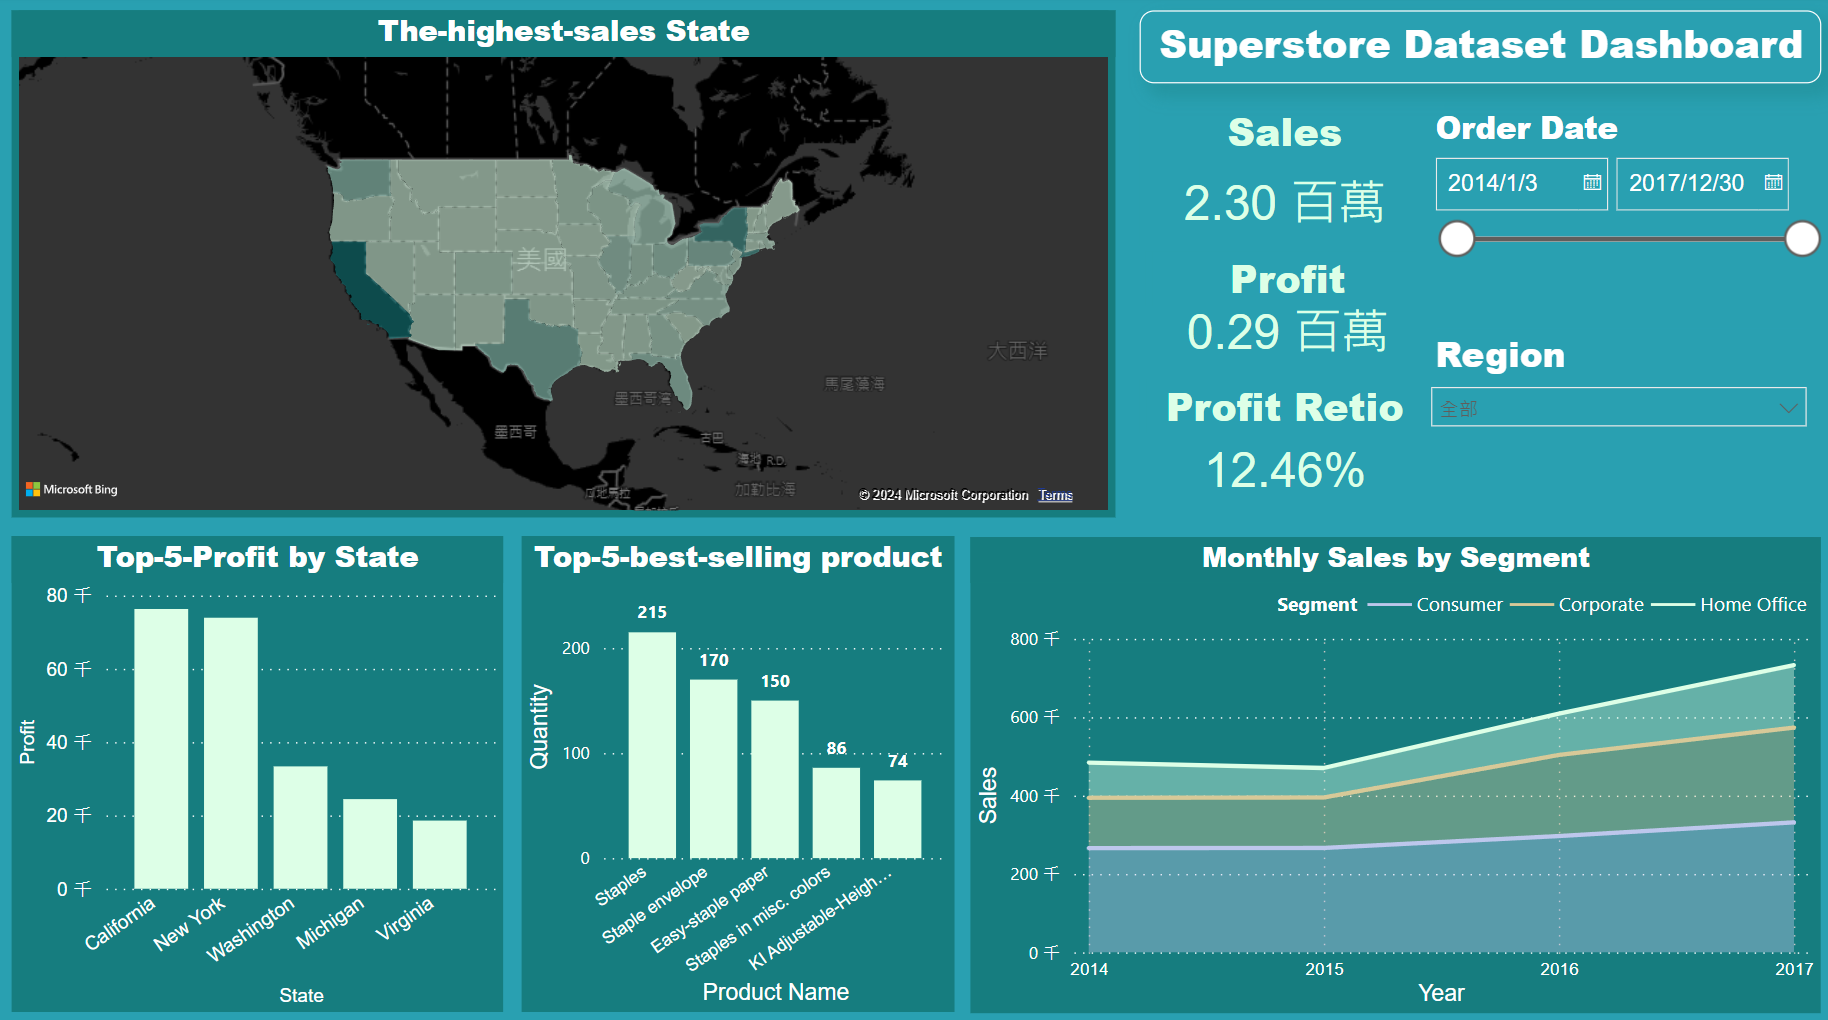

### 關於資料：
隨著市場需求的不斷增長和激烈的競爭，超市巨頭正在尋求您的知識，以了解什麼最適合他們。 他們想了解他們應該瞄準或避免哪些產品、地區、類別和客戶群。

資料來源：https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data
  

### 數據特徵：
* Row ID：每行的 ID
* Order ID：每個客戶的訂單 ID
* Order Date：產品的訂購日期
* Ship Date：產品的出貨日期
* Ship Mode：客戶指定的運輸模式
* Customer ID：用於識別每個客戶的ID
* Customer Name：客戶名稱
* Segment：客戶類別
* Country：客戶居住的國家
* City ：客戶居住的城市
* State ：客戶的居住州
* Postal Code ：每位客戶的郵遞區號
* Region ：客戶所屬區域
* Product ID ：產品ID
* Category ：所訂購產品的類別
* Sub-Category ：所訂購產品的子類別
* Product Name ：產品名稱
* Sales ：產品的銷售
* Quantity ：產品數量
* Discount ：提供折扣
* Profit ：產生的利潤/損失



### 內容：
1. 載入套件
2. 資料準備及預處理
3. EDA
* 銷售數據探索
    * 總銷售額與成長率
    * 總收益和成長率
    * 哪些月份銷售額高？一周中星期幾銷售額最高？
    * 哪些月份利潤高？一周中星期幾利潤最高？
    * 每年客單價為多少？今年比去年上升還是下降？

* 產品類別數據探索
    * 哪個產品類別銷售額高？
    * 哪個產品類別利潤高？

* 地區數據探索
    * 哪個州的銷售額最高
    * 哪個州的利潤最高？有負利潤的州嗎？

4. 特徵處理
5. K-Means分群
6. 總結


#### 1. 載入套件

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, boxcox, yeojohnson
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


#### 2. 資料準備及預處理

In [2]:
df = pd.read_csv("Sample - Superstore.csv", encoding= "windows-1252")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [13]:
# confirm missing value detail
missing_values = pd.DataFrame({'Feature': df.columns,
                               'nums of missing values': df.isnull().sum().values,
                               '% of missing values': ((df.isnull().sum().values)/len(df)*100)})

unique_values = pd.DataFrame({'Feature': df.columns,
                  'nums of unique values': df.nunique().values})

feature_type = pd.DataFrame({'Feature': df.columns,
                 'DataType': df.dtypes})

merge_df = pd.merge(missing_values, unique_values, on = 'Feature', how = 'left')
merge_df = pd.merge(merge_df, feature_type, on = 'Feature', how = 'left')
merge_df

,Feature,nums of missing values,% of missing values,nums of unique values,DataType
0,Row ID,0,0.0,9994,int64
1,Order ID,0,0.0,5009,object
2,Order Date,0,0.0,1237,object
3,Ship Date,0,0.0,1334,object
4,Ship Mode,0,0.0,4,object
5,Customer ID,0,0.0,793,object
6,Customer Name,0,0.0,793,object
7,Segment,0,0.0,3,object
8,Country,0,0.0,1,object
9,City,0,0.0,531,object


In [4]:
# confirm numeric values

def confirm_numeric_values(column_name):
    non_numeric_values = pd.to_numeric(df[column_name], errors='coerce').isna().any()
    if non_numeric_values:
        print(column_name,"包含非數字的資料") # true
    else:
        print(column_name,"僅包含數字資料")   # false

sales_check = confirm_numeric_values('Sales')
quantity_check = confirm_numeric_values('Quantity')
discount_check = confirm_numeric_values('Discount')
profit = confirm_numeric_values('Profit')


Sales 僅包含數字資料
Quantity 僅包含數字資料
Discount 僅包含數字資料
Profit 僅包含數字資料


In [6]:
# check duplicate value
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


從以上可以觀測到以下兩點：
* Sales的最大值和最小值相差相當大
* 利潤欄最小值為-6599.98，平均值為28.6569，差異太大需要注意是否有極值

#### 3. EDA

##### EDA - 銷售數據探索

In [4]:
df_copy = df.copy()

df_copy["Order Date"] = pd.to_datetime(df_copy["Order Date"])
df_copy.set_index("Order Date", inplace=True)

# 根據年份(resample)重新取樣資料，並將年設為索引
resampled_data = df_copy.resample('Y').sum()
resampled_data.index = resampled_data.index.year

C:\Users\coffe\AppData\Local\Temp\ipykernel_27212\2687979054.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled_data = df_copy.resample('Y').sum()


##### 總銷售額與成長率

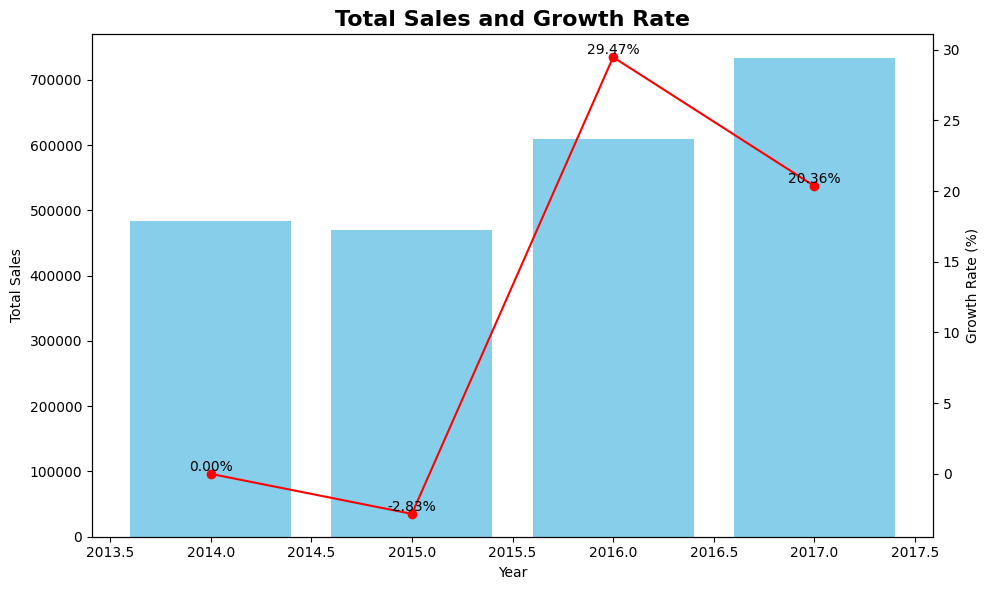

In [5]:
# 計算每年Sales成長率
resampled_data["Growth_Rate_sales"] = resampled_data["Sales"].pct_change() * 100
resampled_data.fillna(0, inplace = True)

# Total sales and Growth Rate
fig, ax1= plt.subplots(figsize=(10, 6))
ax1.bar(resampled_data.index, resampled_data["Sales"], color = "skyblue")
ax2 = ax1.twinx()
ax2.plot(resampled_data.index, resampled_data["Growth_Rate_sales"], color = "red", marker = "o")

for i, rate in enumerate(resampled_data["Growth_Rate_sales"]):
    ax2.text(resampled_data.index[i], rate, f"{rate:.2f}%", ha="center", va="bottom", fontsize=10)
    
ax1.set_title("Total Sales and Growth Rate", weight = "bold",fontsize = "16")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Sales")
ax2.set_ylabel("Growth Rate (%)")
plt.tight_layout()
plt.show()

##### 總收益與成長率

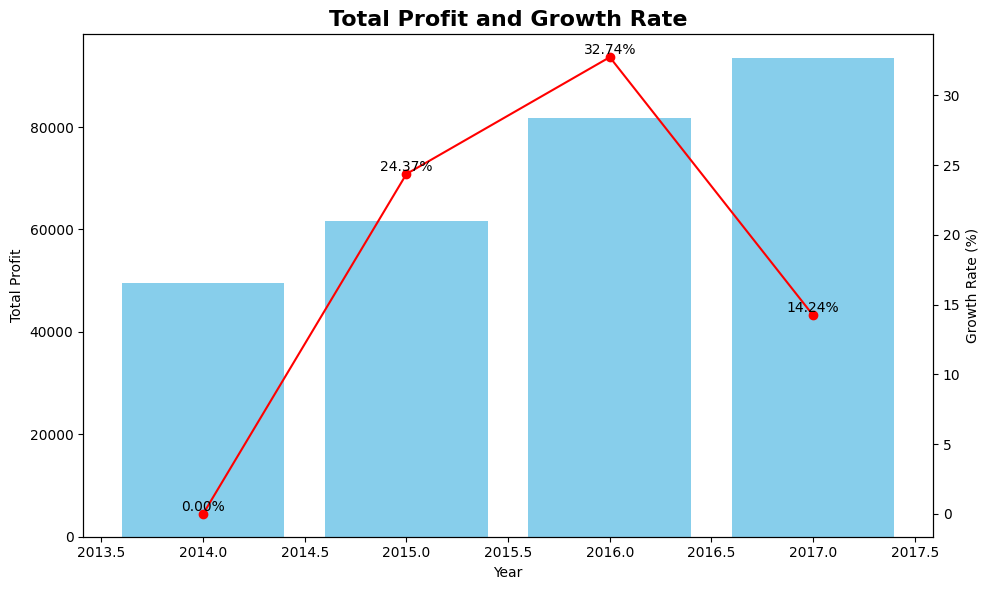

In [6]:
# 計算每年Profit成長率
resampled_data["Growth_Rate_profit"] = resampled_data["Profit"].pct_change() * 100
resampled_data.fillna(0, inplace = True)

# Total Profit and Growth Rate
fig, ax1= plt.subplots(figsize=(10, 6))
ax1.bar(resampled_data.index, resampled_data["Profit"], color = "skyblue")
ax2 = ax1.twinx()
ax2.plot(resampled_data.index, resampled_data["Growth_Rate_profit"], color = "red", marker = "o")

for i, rate in enumerate(resampled_data["Growth_Rate_profit"]):
    ax2.text(resampled_data.index[i], rate, f"{rate:.2f}%", ha="center", va="bottom", fontsize=10)
    
ax1.set_title("Total Profit and Growth Rate", weight = "bold",fontsize = "16")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Profit")
ax2.set_ylabel("Growth Rate (%)")
plt.tight_layout()
plt.show()

In [13]:
# 重新處理時間數據
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order day'] = df['Order Date'].dt.day

day_of_week_names = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

df['Order Day of week'] = df['Order Date'].dt.day_of_week.apply(lambda x:day_of_week_names[x])

##### 哪些月份銷售額高？一周中星期幾銷售額最高？

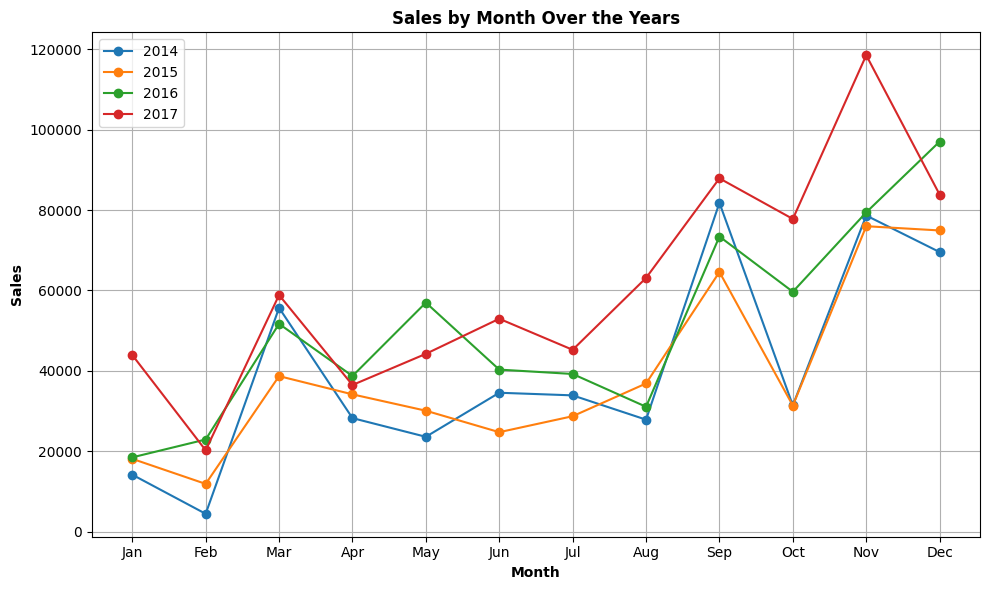

In [10]:
# group by月銷售額
monthly_sales = df.groupby(['Order Year', 'Order Month']).agg({'Sales': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))

# 繪製每年各個月份的銷售額折線圖
for year in monthly_sales['Order Year'].unique():
    data_year = monthly_sales[monthly_sales['Order Year'] == year]
    plt.plot(data_year['Order Month'], data_year['Sales'], marker='o', label=str(year))

# 添加標籤、標題和圖例
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Sales', fontweight='bold')
plt.title('Sales by Month Over the Years', fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# 顯示圖形
plt.grid(True)
plt.tight_layout()
plt.show()

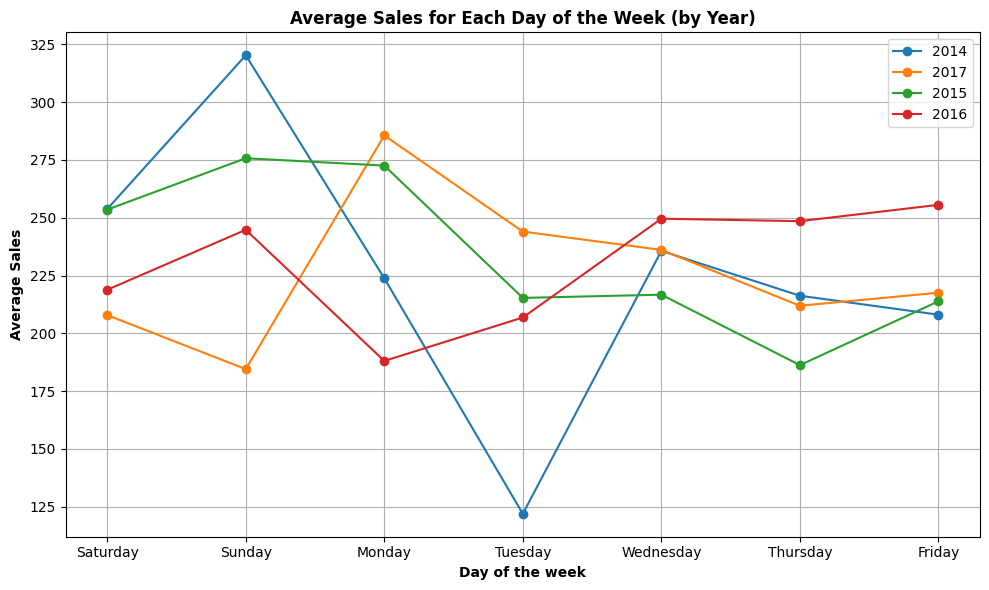

In [16]:
# 定義星期幾的名稱與對應的數字
day_of_week_names = {
    'Saturday': 0,
    'Sunday': 1,
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6
}

# Grouping by year and day of the week and averaging sales
daily_sales_avg_year = df.groupby(['Order Year', 'Order Day of week']).agg({'Sales': 'mean'}).reset_index()

# 將星期幾的名稱轉換為對應的數字
daily_sales_avg_year['Order Day of week'] = daily_sales_avg_year['Order Day of week'].map(day_of_week_names)

# 按照星期幾的數字對資料進行排序
daily_sales_avg_year = daily_sales_avg_year.sort_values(by='Order Day of week')

# Creating a line plot using Matplotlib
plt.figure(figsize=(10, 6))

# Loop through each year and plot a line for average sales for each day of the week
for year in daily_sales_avg_year['Order Year'].unique():
    data_year = daily_sales_avg_year[daily_sales_avg_year['Order Year'] == year]
    plt.plot(data_year['Order Day of week'], data_year['Sales'], marker='o', label=year)

# Adding labels and title
plt.xlabel('Day of the week', fontweight='bold')
plt.ylabel('Average Sales', fontweight='bold')
plt.title('Average Sales for Each Day of the Week (by Year)', fontweight='bold')

# 設置 x 軸標籤為星期幾的名稱
plt.xticks(range(len(day_of_week_names)), day_of_week_names.keys())

# Adding legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

##### 哪些月份利潤高？一周中星期幾利潤最高？

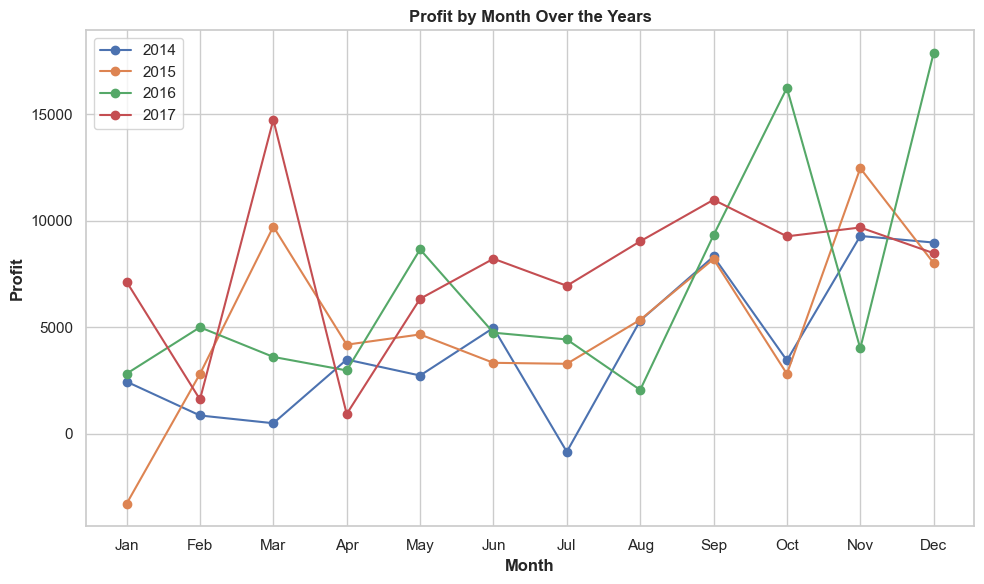

In [ ]:
monthly_profit = df.groupby(['Order Year', 'Order Month']).agg({'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))

# 繪製每年各個月份的銷售額折線圖
for year in monthly_profit['Order Year'].unique():
    data_year = monthly_profit[monthly_sales['Order Year'] == year]
    plt.plot(data_year['Order Month'], data_year['Profit'], marker='o', label=str(year))

# 添加標籤、標題和圖例
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Profit', fontweight='bold')
plt.title('Profit by Month Over the Years', fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# 顯示圖形
plt.grid(True)
plt.tight_layout()
plt.show()

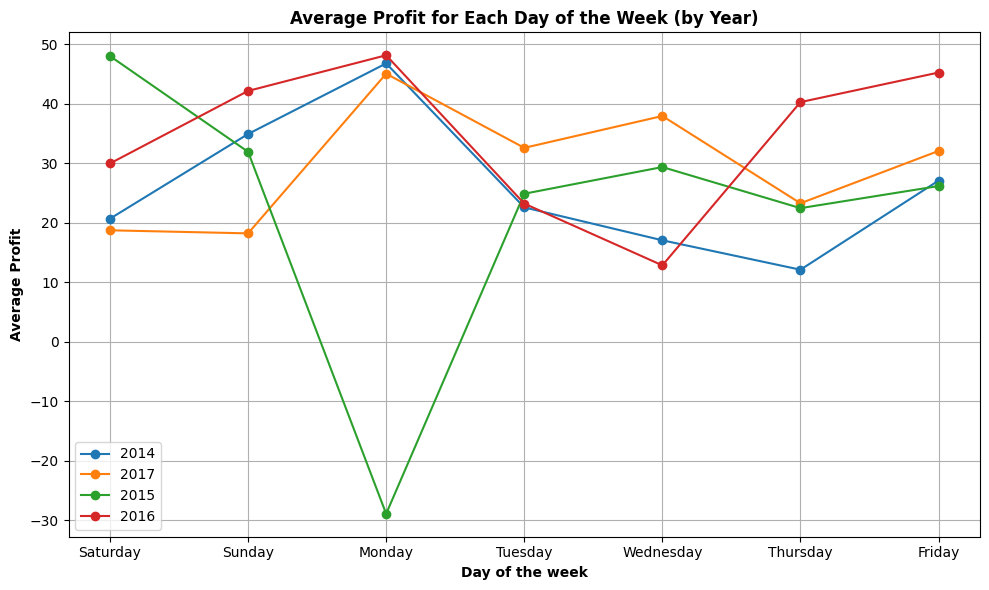

In [17]:
# Grouping by year and day of the week and averaging sales
daily_profit_year = df.groupby(['Order Year', 'Order Day of week']).agg({'Profit': 'mean'}).reset_index()

# 將星期幾的名稱轉換為對應的數字
daily_profit_year['Order Day of week'] = daily_profit_year['Order Day of week'].map(day_of_week_names)

# 按照星期幾的數字對資料進行排序
daily_profit_year = daily_profit_year.sort_values(by='Order Day of week')

# Creating a line plot using Matplotlib
plt.figure(figsize=(10, 6))

# Loop through each year and plot a line for average sales for each day of the week
for year in daily_profit_year['Order Year'].unique():
    data_year = daily_profit_year[daily_profit_year['Order Year'] == year]
    plt.plot(data_year['Order Day of week'], data_year['Profit'], marker='o', label=year)

# Adding labels and title
plt.xlabel('Day of the week', fontweight='bold')
plt.ylabel('Average Profit', fontweight='bold')
plt.title('Average Profit for Each Day of the Week (by Year)', fontweight='bold')

# 設置 x 軸標籤為星期幾的名稱
plt.xticks(range(len(day_of_week_names)), day_of_week_names.keys())

# Adding legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

##### 每年客單價為多少？今年比去年上升還是下降？

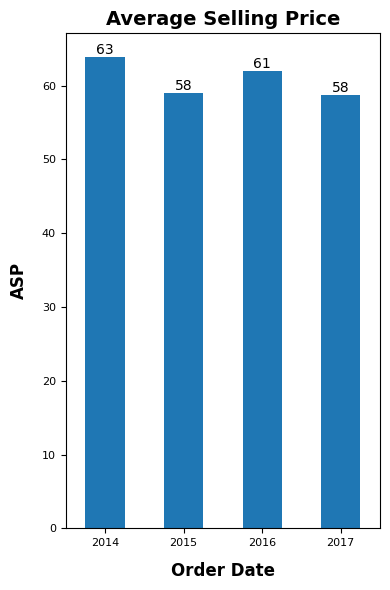

In [18]:
# 計算客單價
resampled_data["Average Selling Price"] = resampled_data["Sales"] / resampled_data["Quantity"]

# ASP plotting
plt.figure(figsize = (4,6))
plt.title("Average Selling Price", weight = "bold", fontsize = 14)
plt.xlabel("YEAR", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("ASP", weight = "bold", fontsize = 12, labelpad = 10)
ax = resampled_data["Average Selling Price"].plot(kind = "bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#增加標註
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height()), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 8)

plt.tight_layout()
plt.show()

從以上可以觀測以下幾點：
* 2017年銷售額成長率下降約9%
* 2017年YoY下降約18.5%
* 客單價下降3美元
* 依各年總銷售額來看，在每年的2月、10月銷售額都會呈現低谷後回升的狀況，銷售旺期為3月、11月
* 依平均銷售額來看的話，2017年最高為星期一，最低為星期日
* 依2017年的總利潤來看，在三月總利潤最高、接著是九月
* 依平均利潤來看，2017年在星期一最高星期日最低
  
表示有三種情況可能正在發生，分別為：
1. 下單數增加
2. 銷售額與去年相比並增加幅度低
3. 客人大多下單低收益產品

####  產品類別數據探索

##### 哪個產品類別銷售額高？


每年各商品類別的銷售額:
Order Date  Category       
2014        Furniture          157192.8531
            Office Supplies    151776.4120
            Technology         175278.2330
2015        Furniture          170518.2370
            Office Supplies    137233.4630
            Technology         162780.8090
2016        Furniture          198901.4360
            Office Supplies    183939.9820
            Technology         226364.1800
2017        Furniture          215387.2692
            Office Supplies    246097.1750
            Technology         271730.8110
Name: Sales, dtype: float64


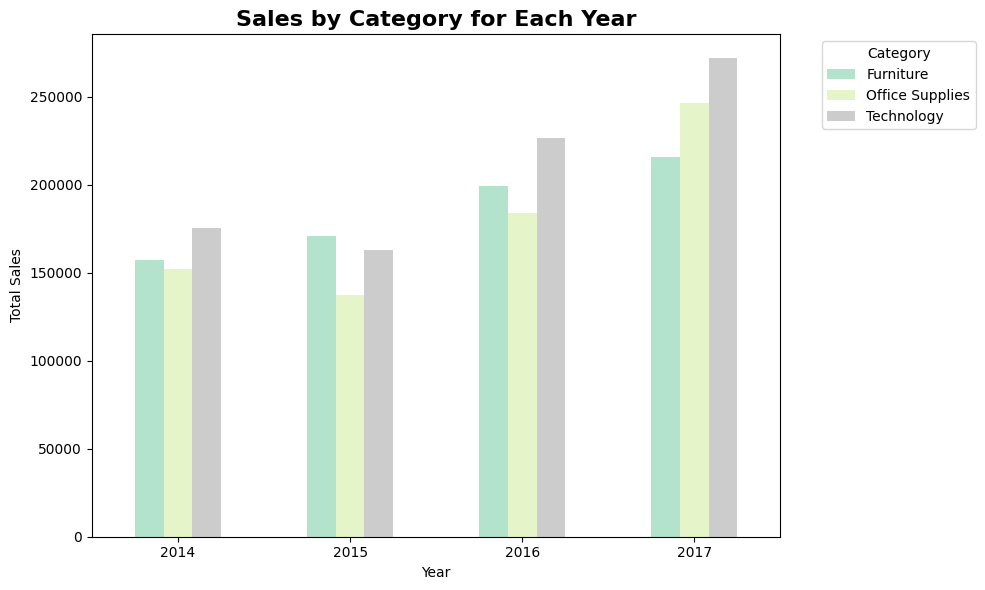

In [7]:
# 按照年份和商品類別分組，並計算每個類別的Sales總和
sales_by_year_and_category = df_group_category.groupby([df_group_category.index.year, "Category"])["Sales"].sum()
print("\n每年各商品類別的銷售額:")
print(sales_by_year_and_category)

# Sales by Category for Each Year
fig, ax = plt.subplots(figsize=(10, 6))
sales_by_year_and_category.unstack().plot(kind='bar', ax=ax, colormap='Pastel2')

ax.set_title("Sales by Category for Each Year", weight = "bold",fontsize = "16")
ax.set_xlabel("Year")
ax.set_ylabel("Total Sales")
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

##### 哪個產品類別利潤高？


每年各商品類別的收益:
Order Date  Category       
2014        Furniture           5457.7255
            Office Supplies    22593.4161
            Technology         21492.8325
2015        Furniture           3015.2029
            Office Supplies    25099.5338
            Technology         33503.8670
2016        Furniture           6959.9531
            Office Supplies    35061.2292
            Technology         39773.9920
2017        Furniture           3018.3913
            Office Supplies    39736.6217
            Technology         50684.2566
Name: Profit, dtype: float64


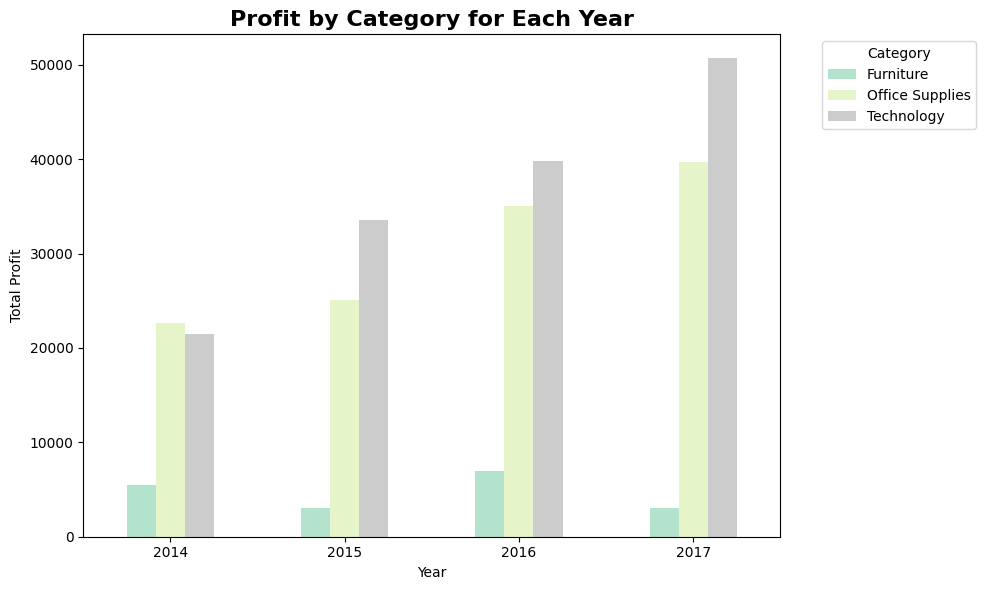

In [8]:
# 按照年份和商品類別分組，並計算每個類別的Profit總和
profit_by_year_and_category = df_group_category.groupby([df_group_category.index.year, "Category"])["Profit"].sum()
print("\n每年各商品類別的收益:")
print(profit_by_year_and_category)

# Profit by Category for Each Year
fig, ax = plt.subplots(figsize=(10, 6))
profit_by_year_and_category.unstack().plot(kind='bar', ax=ax, colormap='Pastel2')

ax.set_title("Profit by Category for Each Year", weight = "bold",fontsize = "16")
ax.set_xlabel("Year")
ax.set_ylabel("Total Profit")
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

以上可以觀測出以下幾點：
* 類別"Technology"的商品為高收益商品
* 類別"Furniture"的商品雖然總銷售額高，但是利潤卻非常低
* 到目前為止(2017年)，總收益趨勢是逐年上升，但幅度趨緩，於2017年收益成長率下滑約16%

In [9]:
yearly_category_profit_quantity = df_group_category.groupby([df_group_category.index.year, 'Category']).agg({'Profit': 'sum', 'Quantity': 'sum'})

yearly_category_profit_quantity['Average Profit per Quantity'] = yearly_category_profit_quantity['Profit'] / yearly_category_profit_quantity['Quantity']

print(yearly_category_profit_quantity)



                                Profit  Quantity  Average Profit per Quantity
Order Date Category                                                          
2014       Furniture         5457.7255      1623                     3.362739
           Office Supplies  22593.4161      4569                     4.944937
           Technology       21492.8325      1389                    15.473602
2015       Furniture         3015.2029      1775                     1.698706
           Office Supplies  25099.5338      4715                     5.323337
           Technology       33503.8670      1489                    22.500918
2016       Furniture         6959.9531      2193                     3.173713
           Office Supplies  35061.2292      5946                     5.896608
           Technology       39773.9920      1698                    23.424024
2017       Furniture         3018.3913      2437                     1.238568
           Office Supplies  39736.6217      7676                

可以觀測到，2016年至2017年家具類的收益下降約4000美元的收益，並且客單價下降約2美元，表示購買家具類別的消費者正在流失

#### 地區數據探索

##### 哪個州的銷售最高呢?

州銷售前五名:  Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania'], dtype='object', name='State')


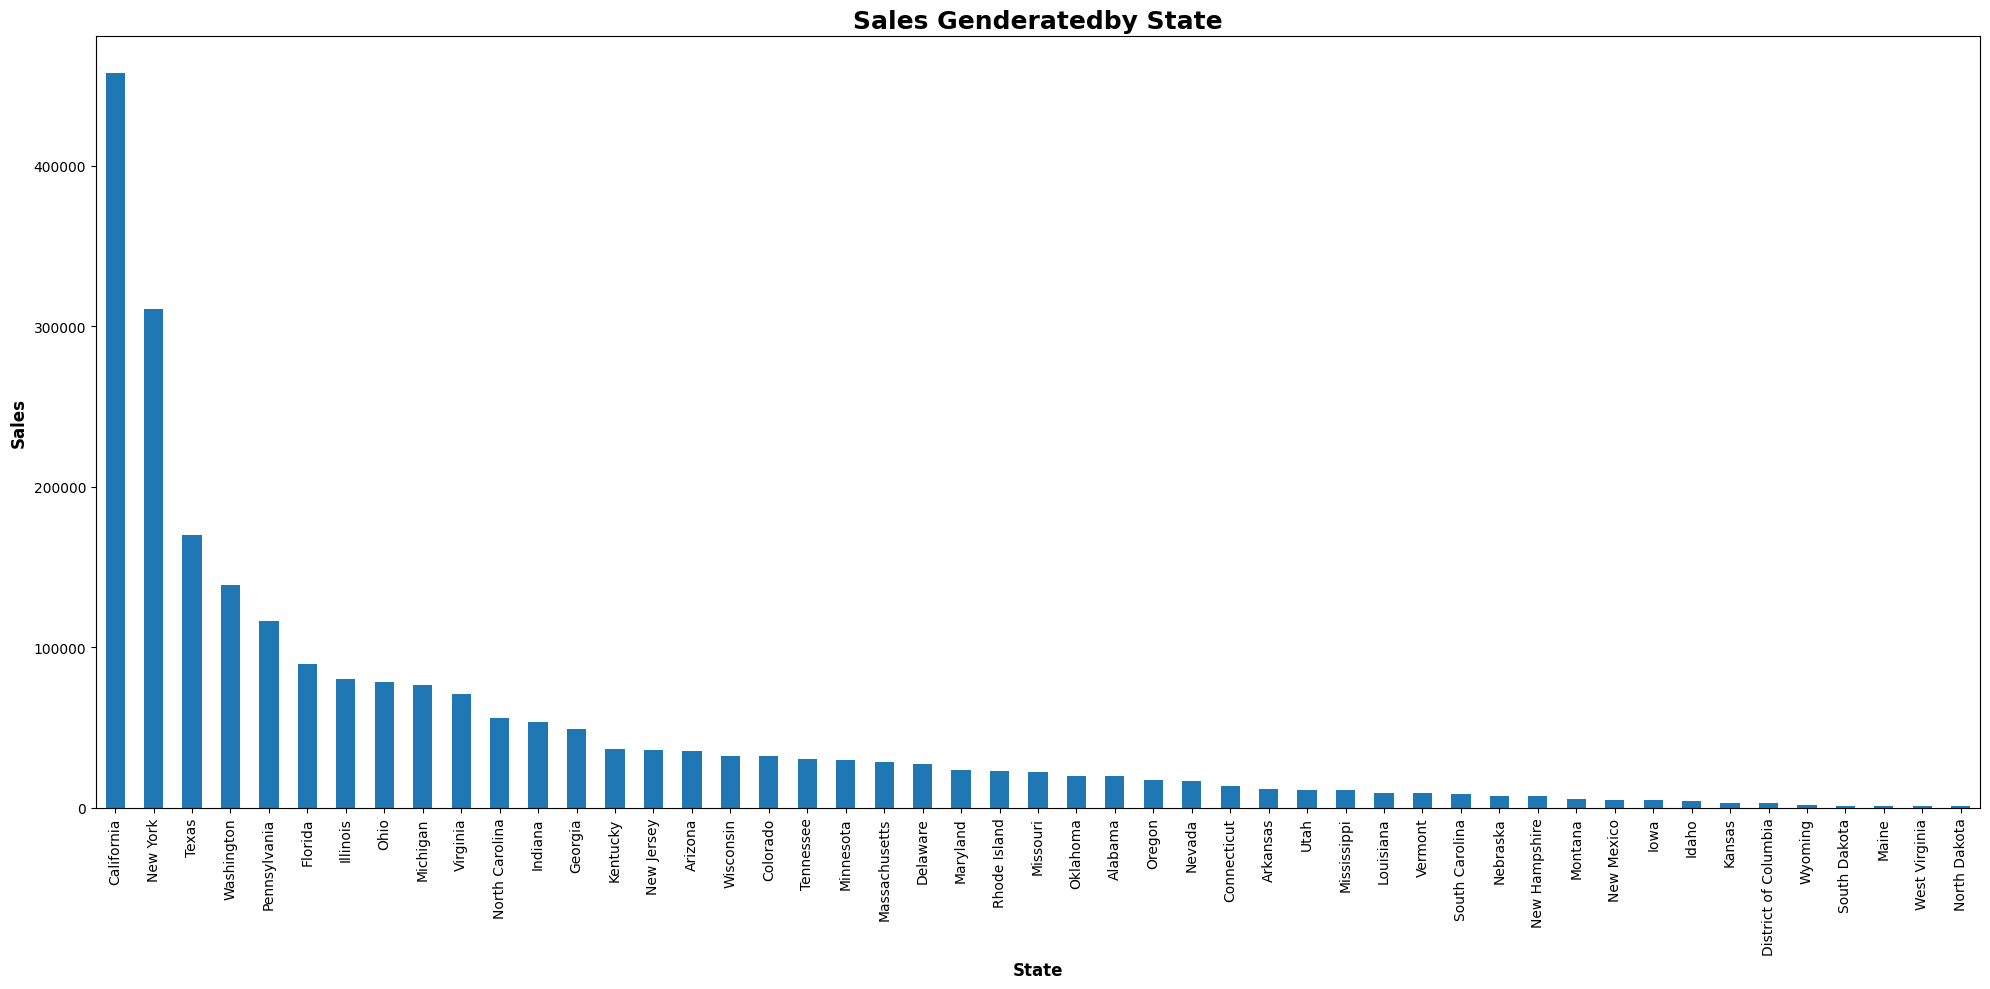

In [13]:
# 州銷售
group_state = df.groupby(["State"]).sum()["Sales"].sort_values(ascending = False)
# 州銷售前五名
print('州銷售前五名: ', group_state.index[0:5])

plt.figure(figsize = (20,10))
plt.title("Sales Genderatedby State", weight = "bold", fontsize = 18)
plt.xlabel("State", weight = "bold", fontsize = 12)
plt.ylabel("Sales", weight = "bold", fontsize = 12)
group_state.plot(kind = "bar")
plt.tight_layout()
plt.show()

##### 哪個州的利潤最高？有負利潤的州嗎？

州利潤前五名:  Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia'], dtype='object', name='State')


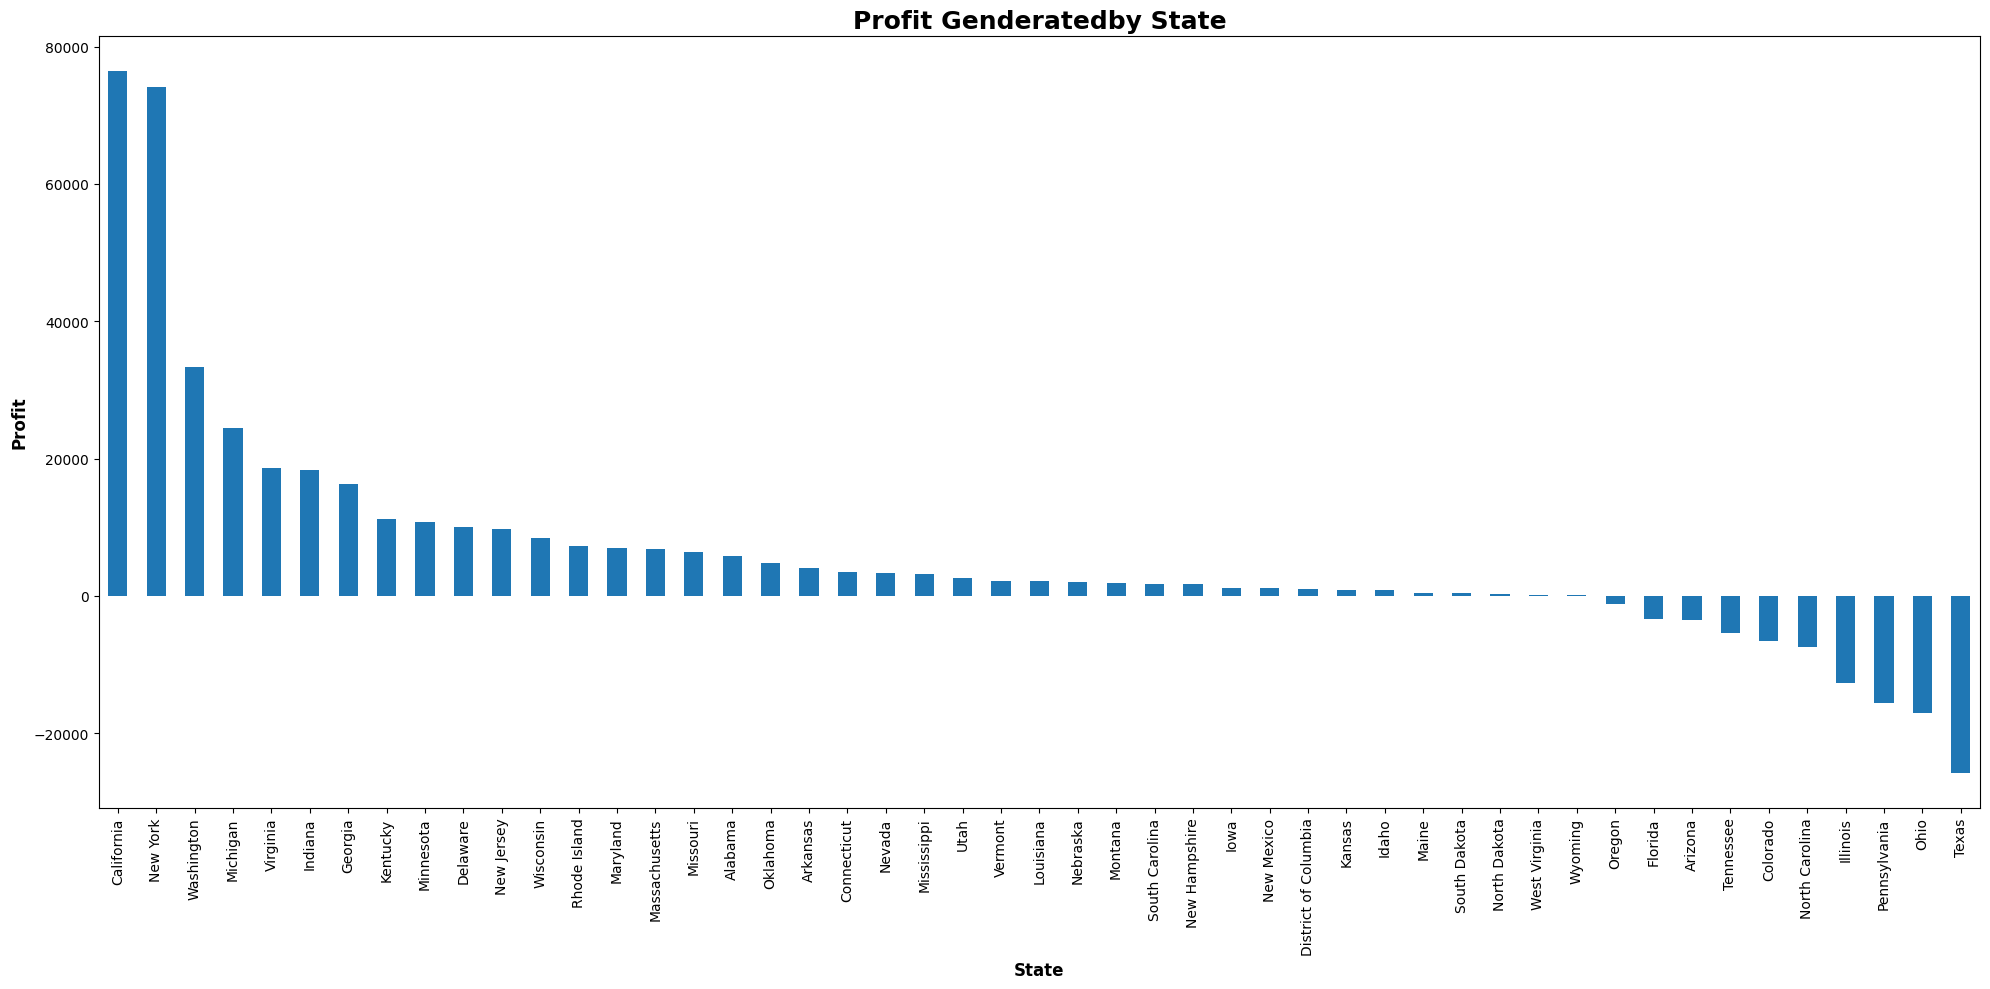

In [14]:
group_state_profit = df.groupby(["State"]).sum()["Profit"].sort_values(ascending = False)
print('州利潤前五名: ', group_state_profit.index[0:5])

plt.figure(figsize = (20,10))
plt.title("Profit Genderatedby State", weight = "bold", fontsize = 18)
plt.xlabel("State", weight = "bold", fontsize = 12)
plt.ylabel("Profit", weight = "bold", fontsize = 12)
group_state_profit.plot(kind = "bar")
plt.tight_layout()
plt.show()

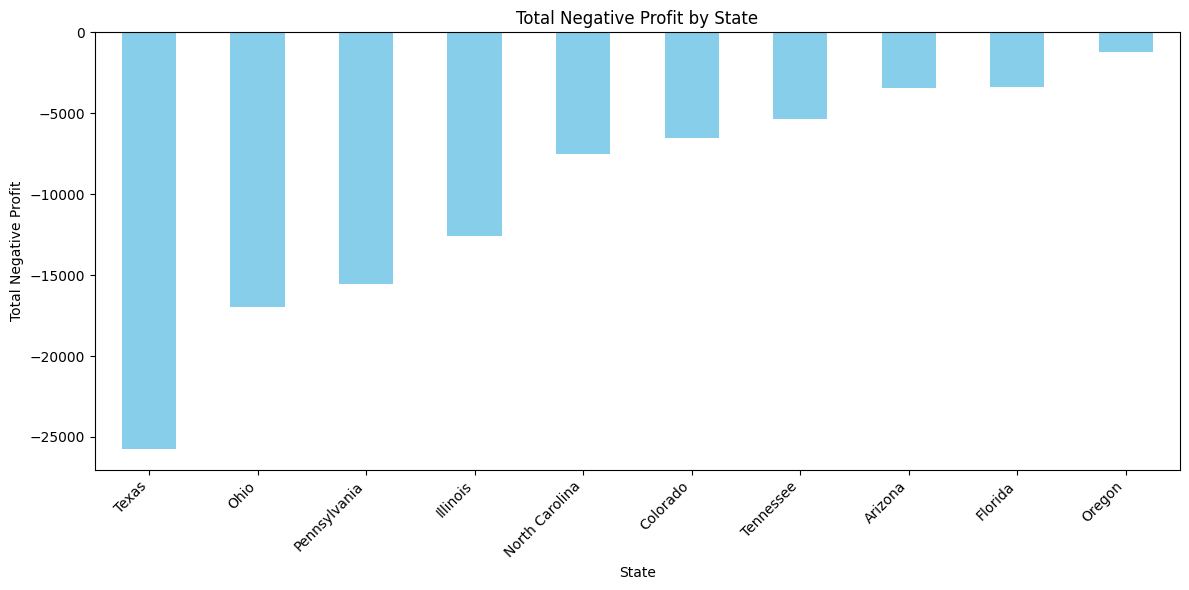

In [13]:
# 查看虧損的國家是那些
state_profit = df.groupby("State")["Profit"].sum()
negative_profit_states = state_profit[state_profit < 0]
sorted_negative_profit_states = negative_profit_states.sort_values()

# plotting
plt.figure(figsize=(12, 6))
sorted_negative_profit_states.plot(kind="bar", color="skyblue")
plt.title("Total Negative Profit by State")
plt.xlabel("State")
plt.ylabel("Total Negative Profit")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
texas_data = df[df['State'] == 'Texas']
texas_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
34,35,CA-2017-107727,10/19/2017,10/23/2017,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.4720,3,0.20,9.9468
35,36,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.5440,7,0.20,123.4737
36,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,9920,CA-2016-149272,3/15/2016,3/19/2016,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,528.4300,5,0.30,-143.4310
9920,9921,CA-2016-149272,3/15/2016,3/19/2016,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176
9961,9962,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,OFF-PA-10000675,Office Supplies,Paper,Xerox 1919,65.5840,2,0.20,23.7742
9962,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704


In [25]:
texas_negative_profit_data = df[(df['State'] == 'Texas') & (df['Profit'] < 0)]
negative_profit_sum = texas_negative_profit_data['Profit'].sum()

texas_positive_profit_data = df[(df['State'] == 'Texas') & (df['Profit'] > 0)]
positive_profit_sum = texas_positive_profit_data['Profit'].sum()

print("營利為: ", positive_profit_sum)
print("虧損值為: ", negative_profit_sum)
print("相抵後: ", positive_profit_sum + negative_profit_sum)

營利為:  11083.8312
虧損值為:  -36813.1875
相抵後:  -25729.3563


以上可觀測出以下幾點：

* California及New York為銷售及獲利前兩名
* Texas(德克斯州)原為銷售額第四名，卻是虧損第一名的州
* Pennsylvania(賓夕凡尼亞州)原為銷售額第五名，為虧損第三名的州
* 共有10個國家虧損，其中虧損值最大的是德克薩斯州(Texas)，主要原因為折扣太多，導致虧損過高
  
針對德克斯州與賓夕凡尼亞有銷售額高、虧損也高的狀況，需要評估折扣策略並優化，因為可能存在過度折扣的情況，需要調整折扣率、折扣條件或折扣時間的長短。

#### 特徵處理

In [20]:
# encode ship mode
df['Ship Mode'].unique()
# array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
#       dtype=object)

ship_mode_rank = {
    'Same Day': 4,
    'First Class': 3,
    'Second Class': 2,
    'Standard Class': 1
}

df_copy = df.copy()
df_copy['encode ship mode'] = df_copy['Ship Mode'].map(ship_mode_rank)
df_copy['encode ship mode'].head()

# group by customerID and aggregate sales-related metrics
customer_data = df_copy.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit': 'sum',
    'encode ship mode': lambda x: x.mode().iloc[0]
}).reset_index()

C:\Users\coffe\AppData\Local\Temp\ipykernel_27212\79429056.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data['Sales'], ax=ax[0, 0])
C:\Users\coffe\AppData\Local\Temp\ipykernel_27212\79429056.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data['Quantity'], ax=ax[0, 1

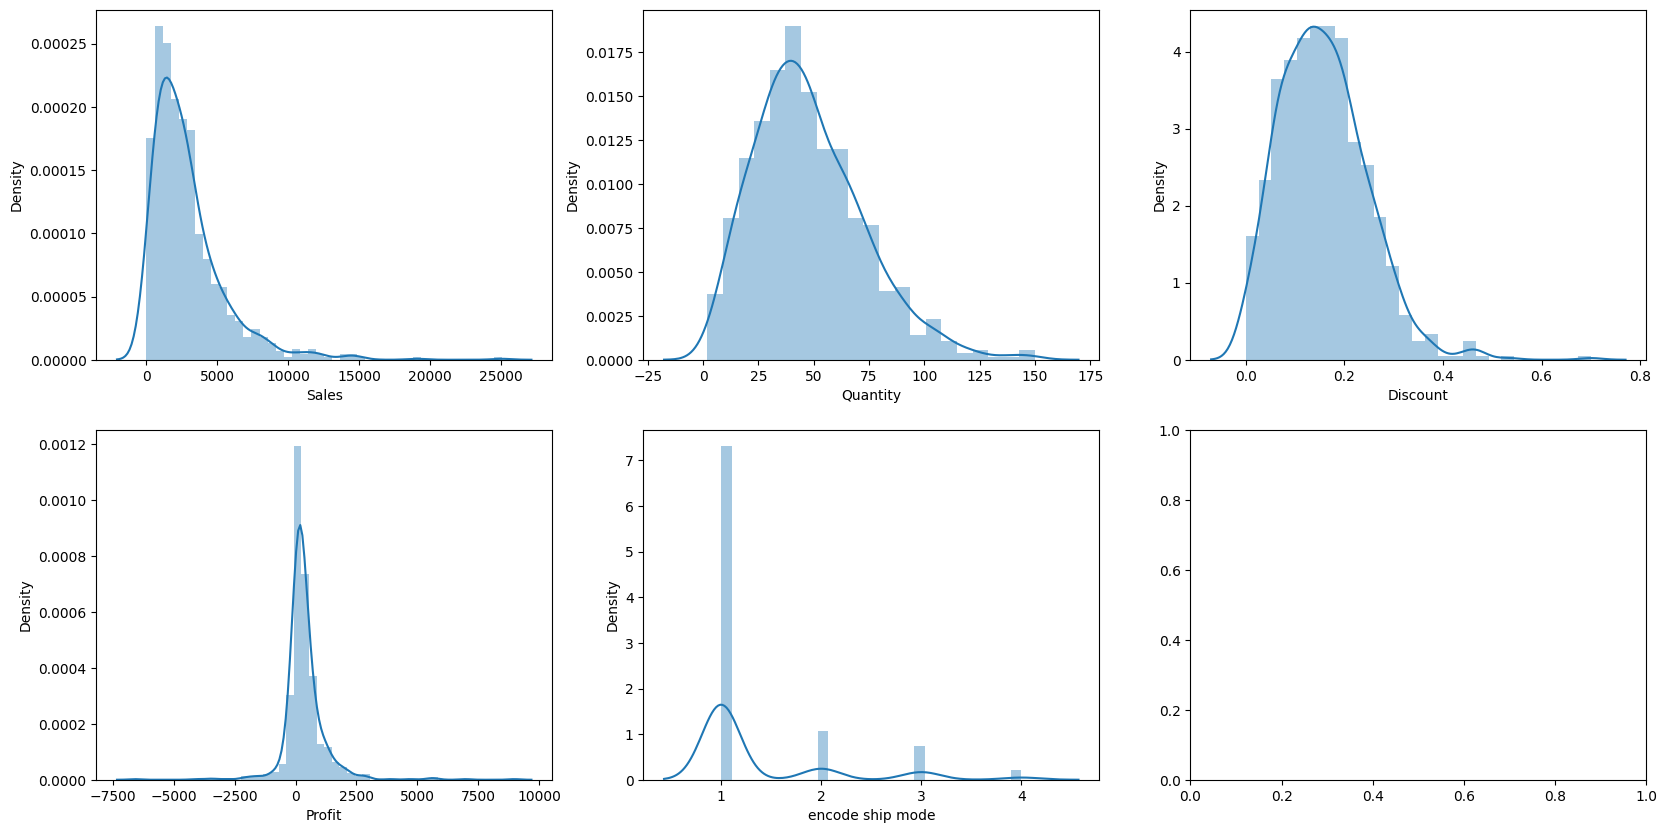

In [21]:
# 查看資料偏態

fig, ax = plt.subplots(2, 3, figsize=(20,10))
sns.distplot(customer_data['Sales'], ax=ax[0, 0])
sns.distplot(customer_data['Quantity'], ax=ax[0, 1])
sns.distplot(customer_data['Discount'], ax=ax[0, 2])
sns.distplot(customer_data['Profit'], ax=ax[1, 0])
sns.distplot(customer_data['encode ship mode'], ax=ax[1, 1])
plt.show()


In [23]:
# 偏態處理

def skewness_test(data, features):
    """
    對特徵進行偏態處理並測試偏態值

    Parameters:
        data (DataFrame): 輸入資料框。
        features (list): 要處理的特徵列表。

    Returns:
        DataFrame: 處理後的資料框。
    """
    # 複製一份資料以免影響原始資料
    processed_data = data.copy()
    
    # 忽略對數轉換時的警告
    warnings.filterwarnings("ignore")
    
    # 對每個特徵進行偏態處理
    for feature in features:
        # 原始特徵的偏態值
        original_skew = skew(processed_data[feature])
        
        # 對數轉換
        log_transformed = np.log1p(processed_data[feature])
        log_skew = skew(log_transformed)
        
        # Box-Cox 轉換
        try:
            boxcox_transformed, _ = boxcox(processed_data[feature])
            boxcox_skew = skew(boxcox_transformed)
        except:
            boxcox_skew = np.nan
        
        # Yeo-Johnson 轉換
        yeojohnson_transformed, _ = yeojohnson(processed_data[feature])
        yeojohnson_skew = skew(yeojohnson_transformed)
        
        # 選擇最小偏態值的轉換方法
        best_transform = None
        best_skew = None
        if abs(log_skew) <= abs(boxcox_skew) and abs(log_skew) <= abs(yeojohnson_skew):
            best_transform = "log"
            processed_data[feature] = log_transformed
            best_skew = log_skew
        elif abs(boxcox_skew) <= abs(log_skew) and abs(boxcox_skew) <= abs(yeojohnson_skew):
            best_transform = "Box-Cox"
            processed_data[feature] = boxcox_transformed
            best_skew = boxcox_skew
        else:
            best_transform = "Yeo-Johnson"
            processed_data[feature] = yeojohnson_transformed
            best_skew = yeojohnson_skew
        
        # 如果最佳轉換的偏態值大於原始特徵的偏態值，則保留原始特徵
        if best_skew is not None and abs(best_skew) > abs(original_skew):
            processed_data[feature] = data[feature]
            best_transform = "original"
            best_skew = original_skew
        
        # 列印結果
        print(f"Feature: {feature}")
        print(f"Original Skewness: {original_skew:.4f}")
        print(f"Best Transformation: {best_transform}")
        print(f"Skewness after transformation: {best_skew:.4f}")
        print("------------------------------")
    
    return processed_data

processed_customer_data = skewness_test(customer_data, ['Sales', 'Quantity', 'Discount', 'Profit', 'encode ship mode'])
print(processed_customer_data.head())


Feature: Sales
Original Skewness: 2.4719
Best Transformation: Yeo-Johnson
Skewness after transformation: 0.0309
------------------------------
Feature: Quantity
Original Skewness: 0.8009
Best Transformation: Box-Cox
Skewness after transformation: -0.0106
------------------------------
Feature: Discount
Original Skewness: 0.8591
Best Transformation: Yeo-Johnson
Skewness after transformation: 0.0095
------------------------------
Feature: Profit
Original Skewness: 1.8274
Best Transformation: original
Skewness after transformation: 1.8274
------------------------------
Feature: encode ship mode
Original Skewness: 2.1069
Best Transformation: Box-Cox
Skewness after transformation: 1.3754
------------------------------
  Customer ID      Sales   Quantity  Discount    Profit  encode ship mode
0    AA-10315  37.546596   8.706732  0.079072 -362.8825          0.000000
1    AA-10375  22.054696  10.474650  0.070704  277.3824          0.000000
2    AA-10480  26.204159   9.705801  0.016228  435.8274

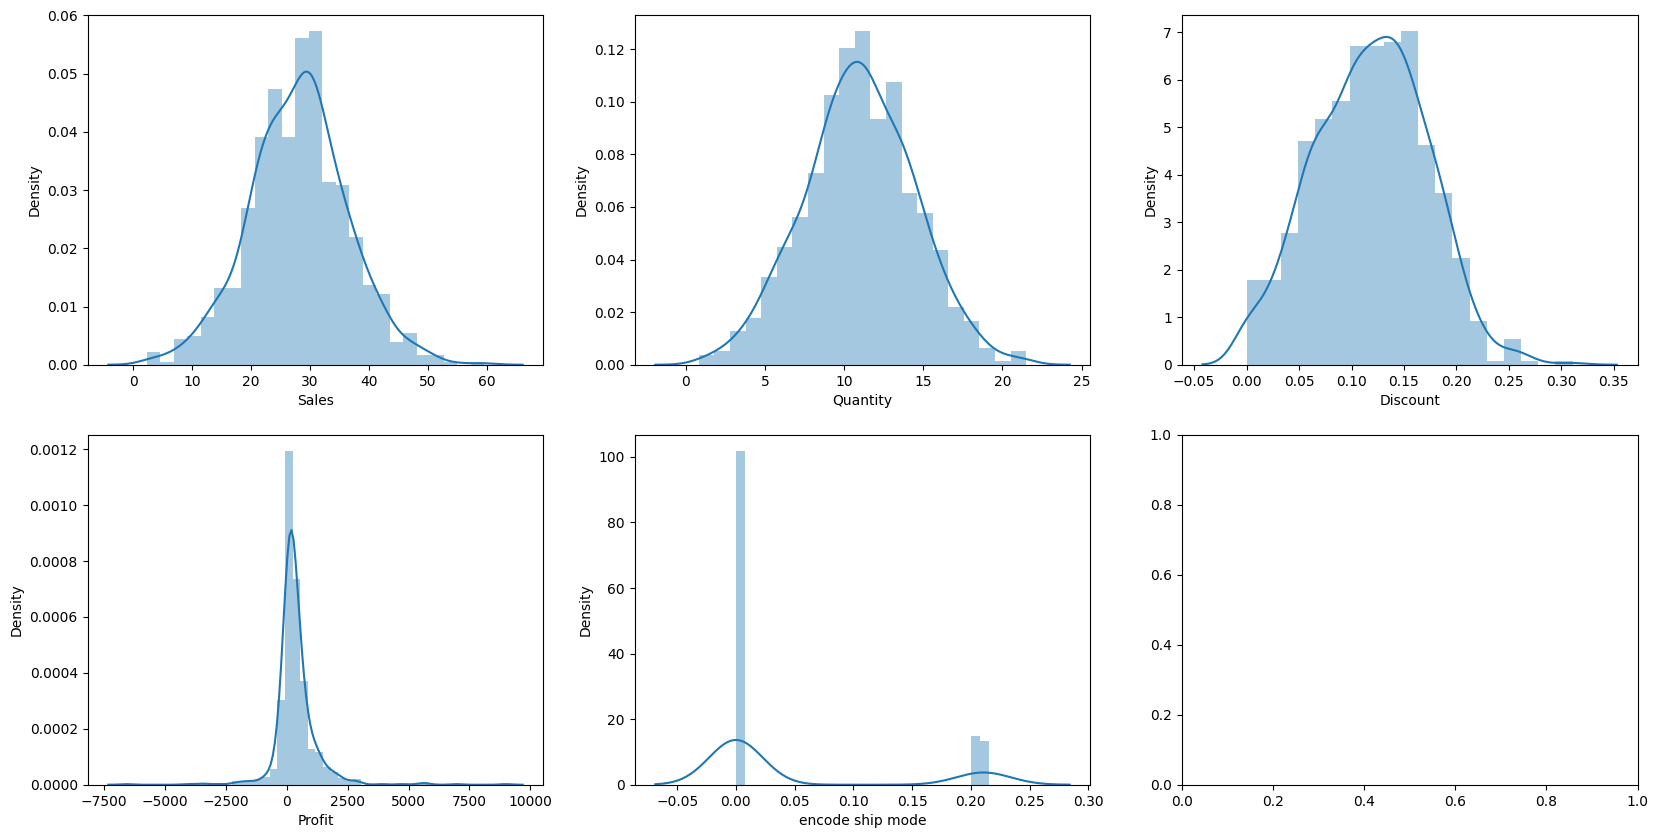

In [24]:
# 查看處理後的資料偏態(processed_customer_data)
# 可以看到結果除了encode ship mode，其他特徵近似常態

fig, ax = plt.subplots(2, 3, figsize=(20,10))
sns.distplot(processed_customer_data['Sales'], ax=ax[0, 0])
sns.distplot(processed_customer_data['Quantity'], ax=ax[0, 1])
sns.distplot(processed_customer_data['Discount'], ax=ax[0, 2])
sns.distplot(processed_customer_data['Profit'], ax=ax[1, 0])
sns.distplot(processed_customer_data['encode ship mode'], ax=ax[1, 1])
plt.show()


## K-Means 分群

In [25]:
# 在KMeans可以用歐式距離霍曼哈頓距離來定義資料間的相似性，因為是距離，所以需先確保所有資料的尺度是相同的，因次先來將它做標準化
# StandardScaler：將資料轉換成平均值為 0，標準差為 1 的標準常態分佈。
# MinMaxScaler：將資料縮放到指定的範圍內，通常是 [0, 1] 或 [-1, 1]。

scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_customer_data.drop('Customer ID', axis=1))

# fit_transform: 進行資料轉換

Text(0.5, 1.0, 'Elbow Method for Optimal Number of Clusters')

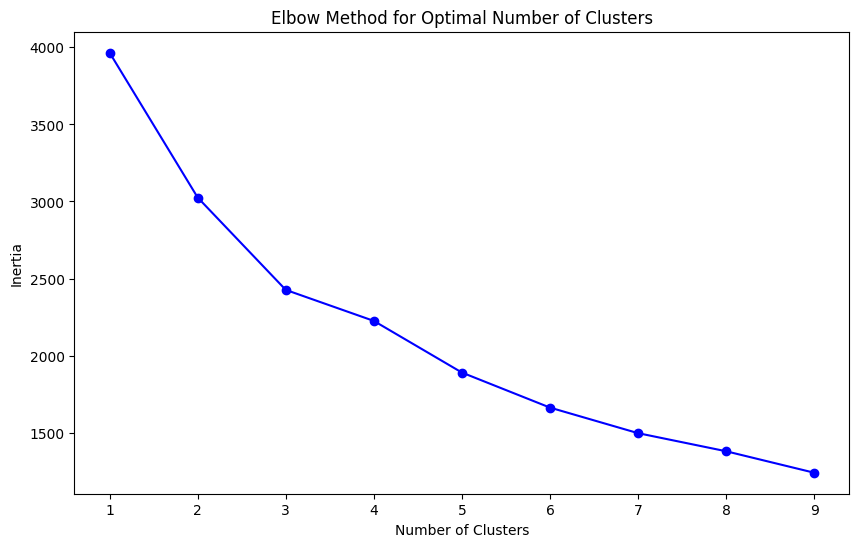

In [26]:
intertia = []

for k in range(1, 10):
    model = KMeans(n_clusters=k, init='k-means++', random_state= 33)
    model.fit(scaled_data)
    intertia.append(model.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), intertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')

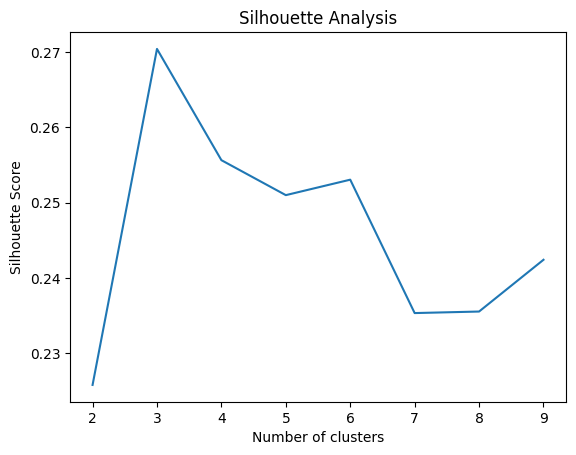

In [27]:
# 計算 silhouette 分數
silhouette_scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=33)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)  # 將變數名稱修改為 score
    silhouette_scores.append(score)  # 使用新的變數名稱 score

# 繪製輪廓分析法圖
plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [70.0, 70.0, 111.25, 111.25],
  [21.25, 21.25, 90.625, 90.625],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [170.0, 170.0, 193.75, 193.75],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [232.5, 232.5, 262.5, 262.5],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [290.0, 290.0, 320.0, 320.0],
  [247.5, 247.5, 305.0, 305.0],
  [181.875, 181.875, 276.25, 276.25],
  [150.0, 150.0, 229

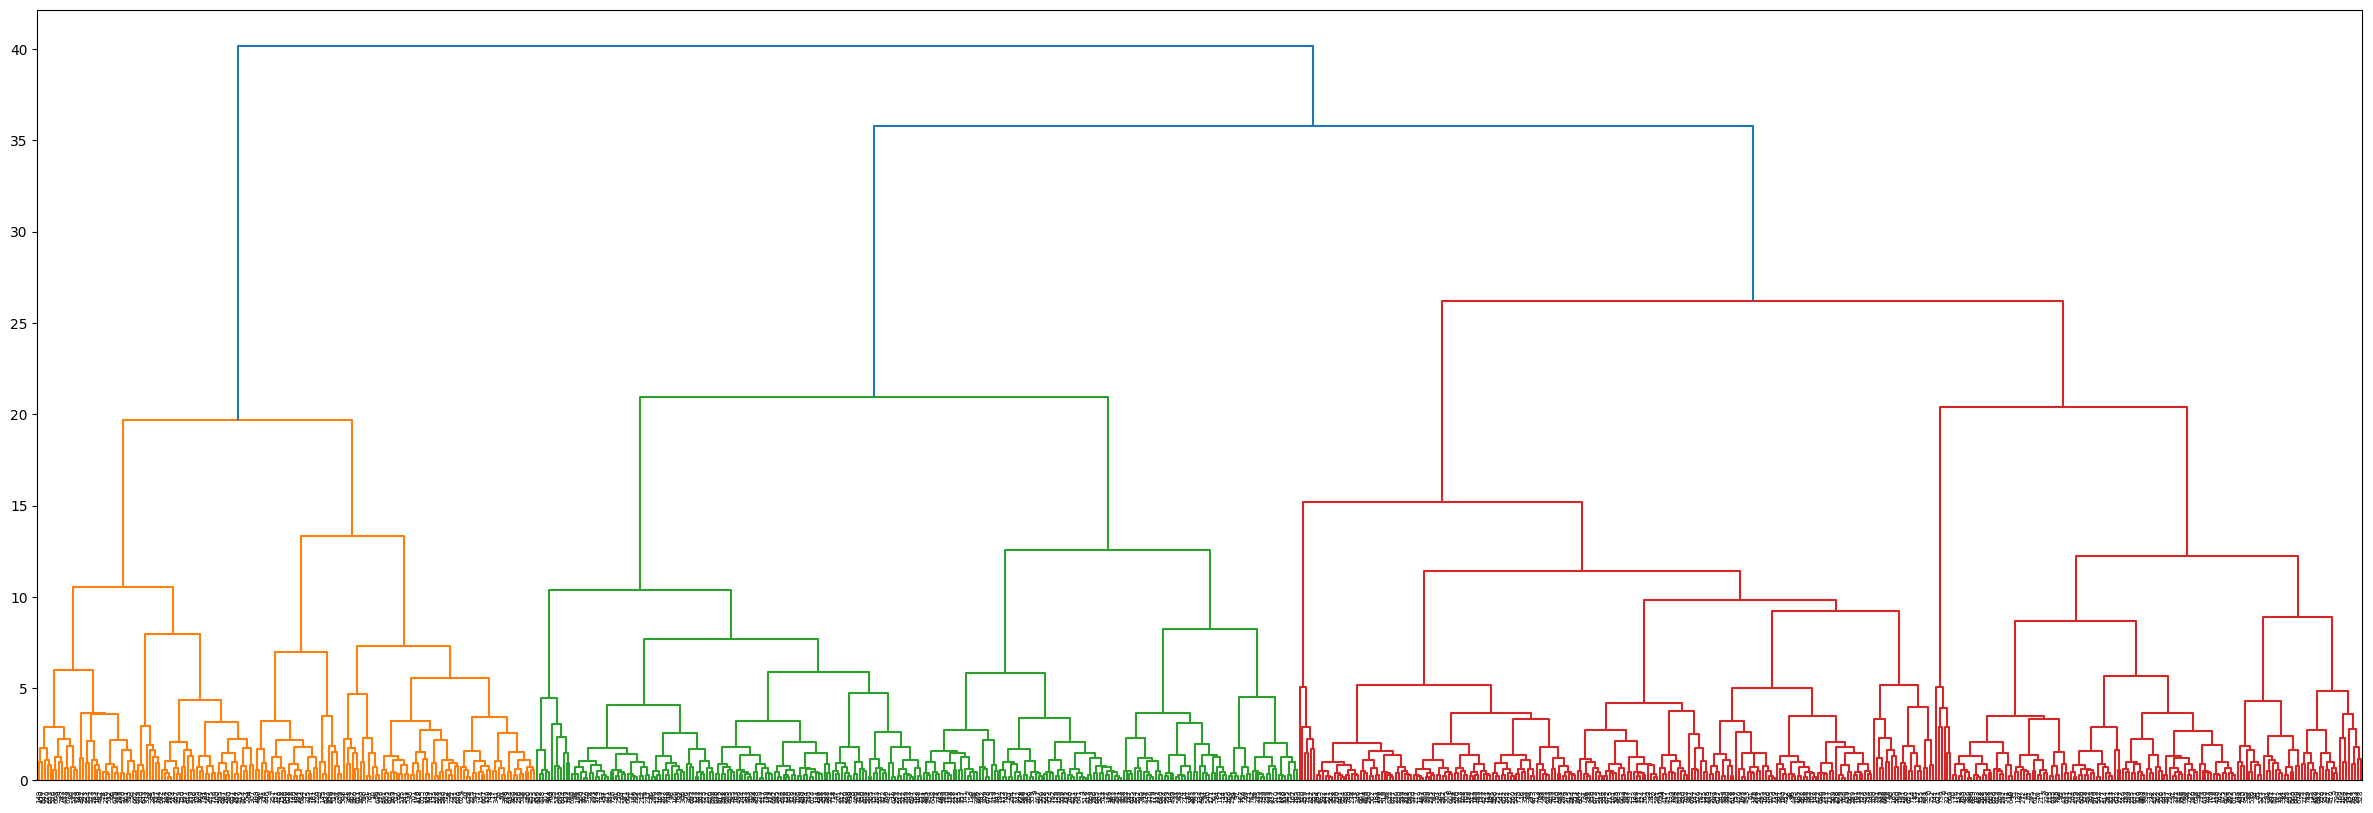

In [28]:
plt.figure(figsize=(30,10))
z = sch.linkage(scaled_data, 'ward')
sch.dendrogram(z)

In [29]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=33)  # You can adjust the number of clusters as needed
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=33)

In [30]:
# 從以上結果推測cluster為3
customer_data['Cluster'] = kmeans.labels_

In [31]:
df = pd.merge(df, customer_data[['Customer ID', 'Cluster']], on='Customer ID', how='left')

In [32]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order day,Order Day of week,Cluster
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,Sunday,2
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,Sunday,2
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,Friday,0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,Friday,0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,Friday,0


In [33]:
def remove_outliers(df, columns):
    """
    Remove outliers from the DataFrame based on specified columns.
    
    Parameters:
        df (DataFrame): Input DataFrame.
        columns (list): List of columns to consider for outlier removal.
    
    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Calculate the interquartile range (IQR) for each specified column
    Q1 = df[columns].quantile(0.10)
    Q3 = df[columns].quantile(0.90)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers from each specified column
    for col in columns:
        df = df[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]
    
    return df

# Define columns to consider for outlier removal
columns_to_remove_outliers = ['Sales', 'Quantity', 'Discount', 'Profit']

# Apply the remove_outliers function to df and customer_data
df_cleaned = remove_outliers(df, columns_to_remove_outliers)
customer_data = remove_outliers(customer_data, columns_to_remove_outliers)

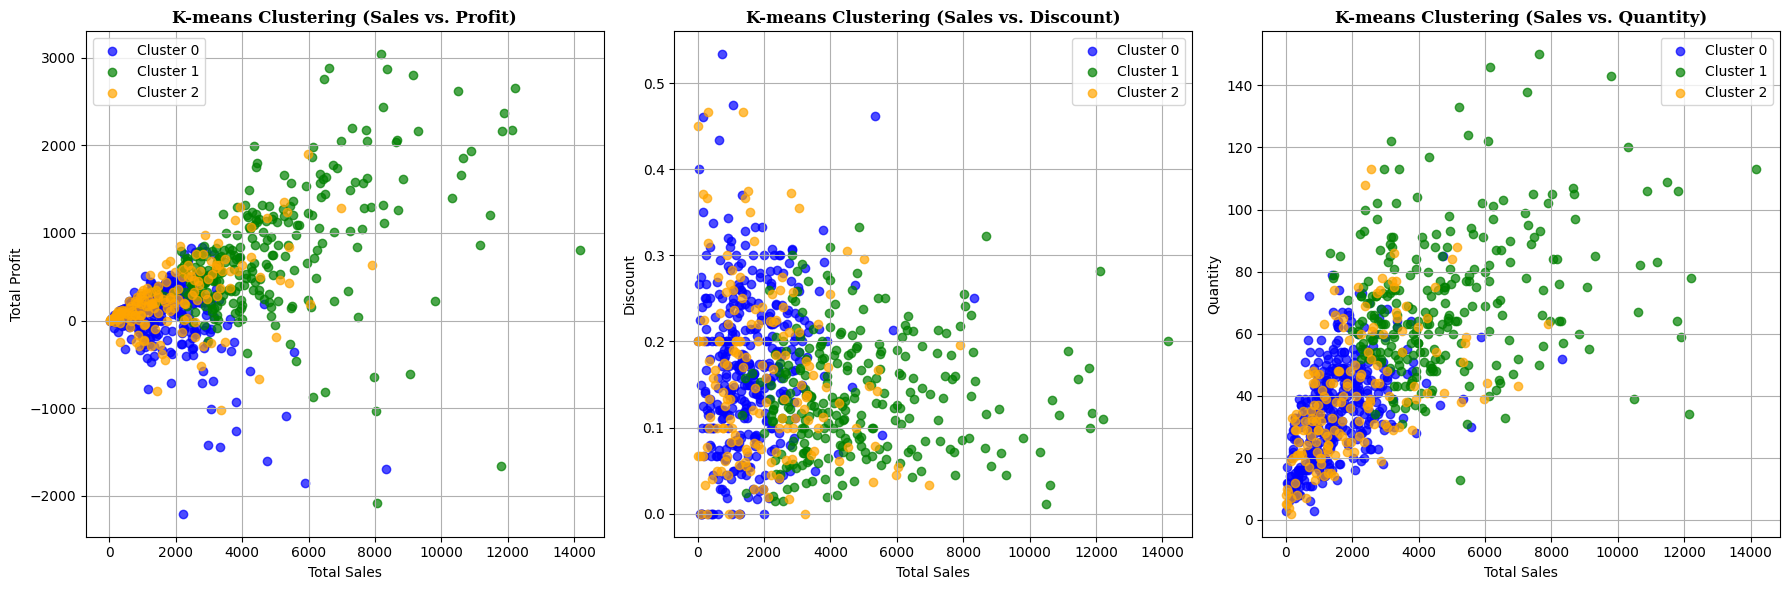

In [34]:
# Plotting the clusters
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
colors = ['blue', 'green', 'orange']  # Custom colors for clusters

# Sales vs. Profit plot
plt.subplot(1, 3, 1)
for cluster in range(customer_data['Cluster'].nunique()):
    cluster_data = customer_data[customer_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Sales'], cluster_data['Profit'], label=f'Cluster {cluster}', color=colors[cluster], alpha=0.7)

plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.title('K-means Clustering (Sales vs. Profit)', fontweight='bold', fontfamily='serif')
plt.legend()
plt.grid(True)  # Add grid for a more professional look

# Sales vs. Discount plot
plt.subplot(1, 3, 2)
for cluster in range(customer_data['Cluster'].nunique()):
    cluster_data = customer_data[customer_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Sales'], cluster_data['Discount'], label=f'Cluster {cluster}', color=colors[cluster], alpha=0.7)

plt.xlabel('Total Sales')
plt.ylabel('Discount')
plt.title('K-means Clustering (Sales vs. Discount)',fontweight='bold', fontfamily='serif')
plt.legend()
plt.grid(True)  # Add grid for a more professional look

# Sales vs. Quantity plot
plt.subplot(1, 3, 3)
for cluster in range(customer_data['Cluster'].nunique()):
    cluster_data = customer_data[customer_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Sales'], cluster_data['Quantity'], label=f'Cluster {cluster}', color=colors[cluster], alpha=0.7)

plt.xlabel('Total Sales')
plt.ylabel('Quantity')
plt.title('K-means Clustering (Sales vs. Quantity)', fontweight='bold', fontfamily='serif')
plt.legend()
plt.grid(True)  # Add grid for a more professional look

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

In [35]:
df_cleaned.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order day,Order Day of week,Cluster
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,2016,11,8,Sunday,2
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,2016,11,8,Sunday,2
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,2016,6,12,Friday,0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,2015,10,11,Friday,0
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,2014,6,9,Saturday,1


df_clean是我們已經分群完成並且移處離群值的dataset, 接著查看這4個cluster的特徵：
* 各cluster的銷售額分佈、購買數量分佈、購買折扣品分佈、利潤分佈 (總銷售額和利潤最高的客群為何)
* 偏好的ship mode
* 地區分佈
* Segment分佈

In [36]:
df_cleaned.shape

(9433, 26)

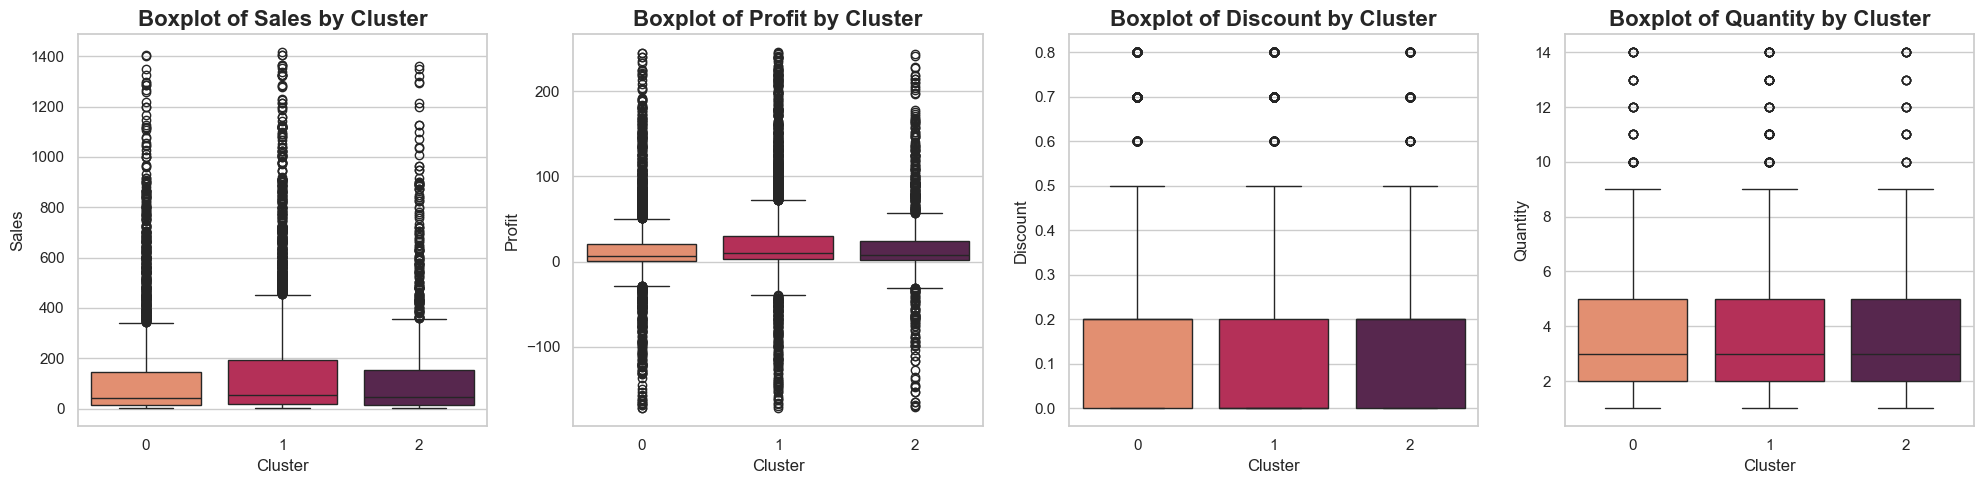

In [37]:
# seaborn style

sns.set(style = 'whitegrid')
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

features = ['Sales', 'Profit', 'Discount', 'Quantity']

for i, feature in enumerate(features):
    sns.boxplot(x='Cluster', y=feature, data=df_cleaned, ax=axes[i], palette='rocket_r')
    axes[i].set_title(f'Boxplot of {feature} by Cluster', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [38]:
def cluster_quantiles(df, features):
    
    # 使用 groupby 分組，然後計算四分位數
    cluster_quantiles = df.groupby('Cluster')[features].describe().transpose()

    return cluster_quantiles


# 使用函數計算並打印結果
result_quantiles = cluster_quantiles(df_cleaned, ['Sales', 'Profit', 'Discount', 'Quantity'])
print(result_quantiles)

# 要記得除了Profit其他都右偏，所以注重觀測最大最小值和四分位數

Cluster                   0            1            2
Sales    count  3439.000000  4377.000000  1617.000000
         mean    126.848346   151.969706   128.991008
         std     198.793225   222.218961   199.690979
         min       0.876000     0.444000     0.836000
         25%      14.980000    17.520000    15.872000
         50%      41.400000    53.920000    45.528000
         75%     146.730000   191.820000   152.800000
         max    1403.920000  1415.760000  1359.960000
Profit   count  3439.000000  4377.000000  1617.000000
         mean     14.107304    21.707521    16.753874
         std      43.490329    48.497234    44.593133
         min    -172.557000  -172.492500  -170.803800
         25%       1.168000     2.417400     1.860400
         50%       6.700800     9.619200     7.822500
         75%      20.986000    30.360400    23.774400
         max     244.615500   245.700000   244.249600
Discount count  3439.000000  4377.000000  1617.000000
         mean      0.169101 

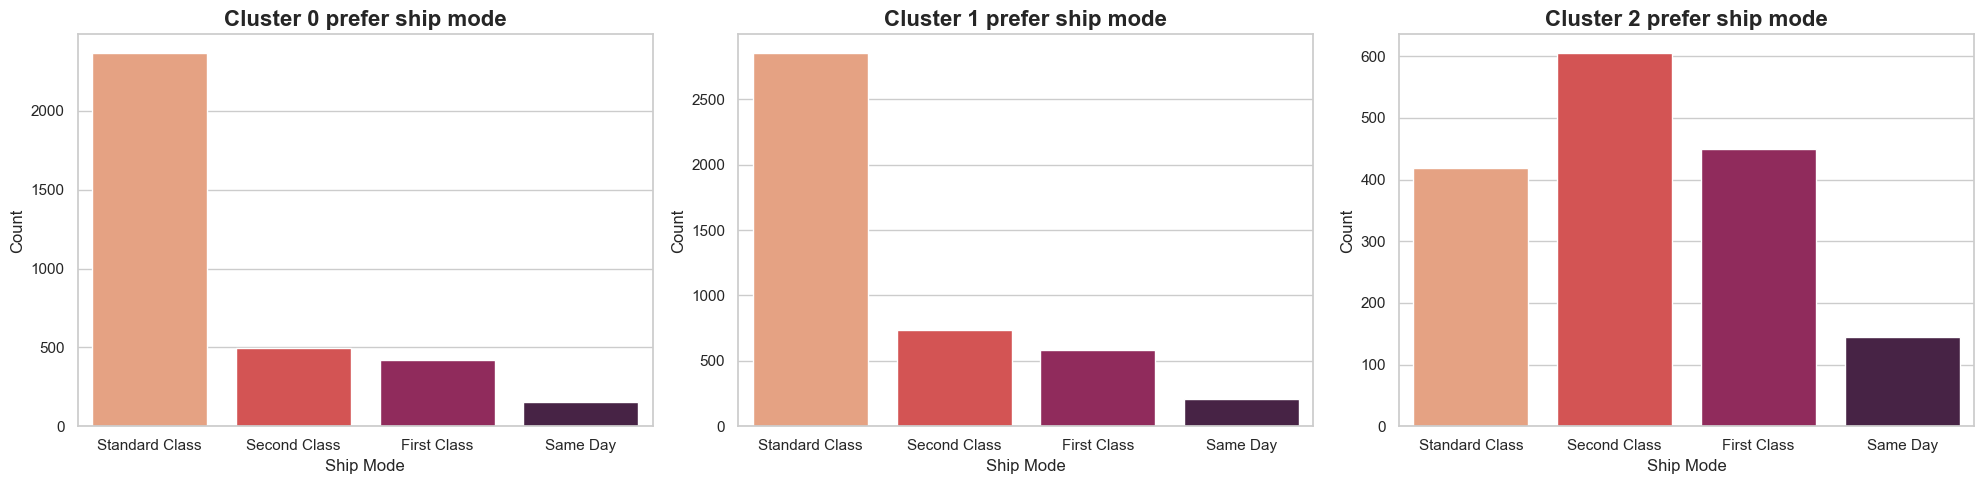

In [39]:
# prefer ship mode
ship_mode_order = ['Standard Class', 'Second Class', 'First Class', 'Same Day']

sns.set(style = 'whitegrid')

plt.figure(figsize = (20, 5))

for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    sns.countplot(x = 'Ship Mode', data = df_cleaned[df['Cluster'] == i], palette='rocket_r', order = ship_mode_order)
    plt.title(f'Cluster {i} prefer ship mode', fontsize = 16, fontweight = 'bold')
    plt.xlabel('Ship Mode')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [40]:
# 使用 groupby 和 value_counts 計算每個群集中每個 ship mode 類別的數量
cluster_ship_mode_counts = df_cleaned.groupby('Cluster')['Ship Mode'].value_counts(normalize=True)

# 將計算結果轉換成 DataFrame 並重設索引
cluster_ship_mode_counts = cluster_ship_mode_counts.reset_index(name='Percentage')

# 使用 pivot_table 將 DataFrame 重新排列，使每個群集作為列，每種 ship mode 作為列，並填充缺失值為 0
cluster_ship_mode_counts = cluster_ship_mode_counts.pivot_table(index='Cluster', columns='Ship Mode', values='Percentage', fill_value=0)

# 打印結果
print(cluster_ship_mode_counts.round(2))

Ship Mode  First Class  Same Day  Second Class  Standard Class
Cluster                                                       
0                 0.12      0.05          0.15            0.69
1                 0.13      0.05          0.17            0.65
2                 0.28      0.09          0.37            0.26


In [41]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

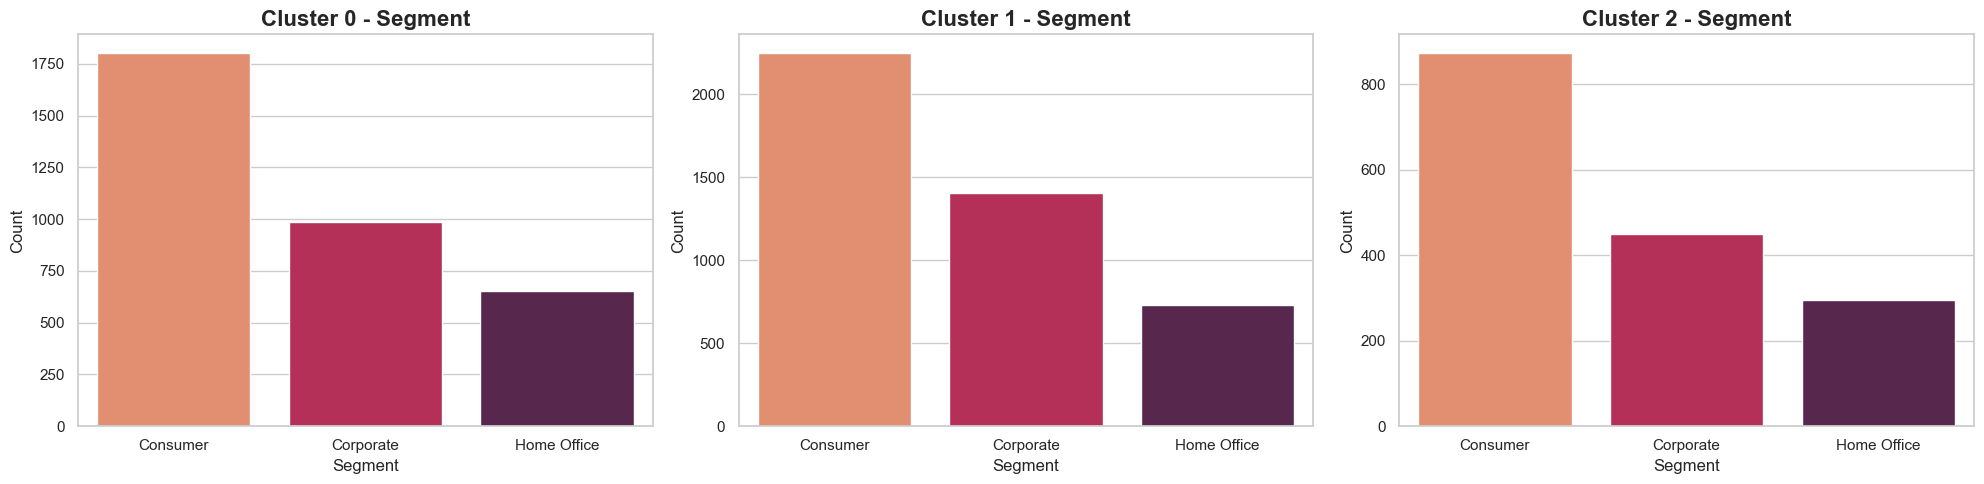

In [42]:
segment_order = ['Consumer', 'Corporate', 'Home Office']

sns.set(style = 'whitegrid')

plt.figure(figsize = (20, 5))

for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    sns.countplot(x = 'Segment', data = df_cleaned[df['Cluster'] == i], palette='rocket_r', order = segment_order)
    plt.title(f'Cluster {i} - Segment', fontsize = 16, fontweight = 'bold')
    plt.xlabel('Segment')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [44]:
segment_counts = df_cleaned.groupby('Cluster')['Segment'].value_counts(normalize=True)
segment_counts = segment_counts.reset_index(name='Percentage')
segment_pivot = segment_counts.pivot_table(index='Cluster', columns='Segment', values='Percentage', fill_value=0)

print(segment_pivot.round(2))

Segment  Consumer  Corporate  Home Office
Cluster                                  
0            0.52       0.29         0.19
1            0.51       0.32         0.17
2            0.54       0.28         0.18


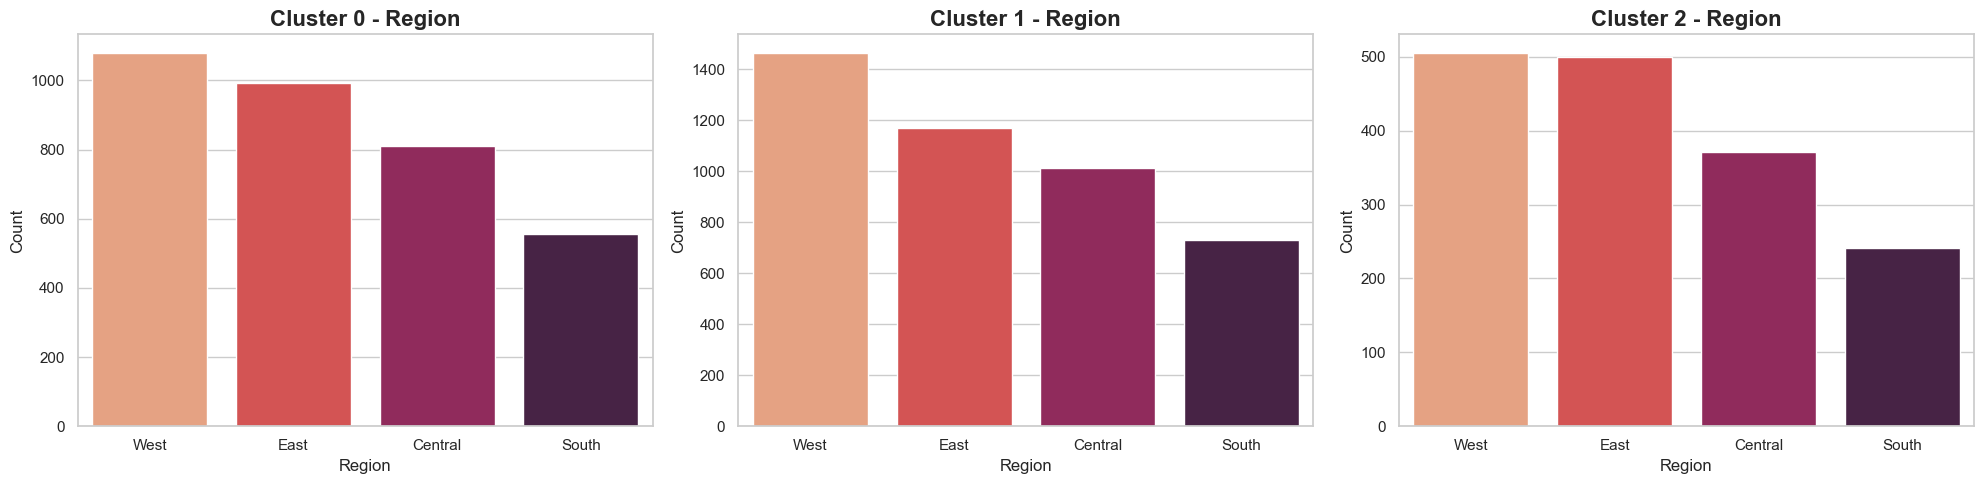

In [45]:
region_order = df_cleaned[df['Cluster'] == i]['Region'].value_counts().index

sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 5))

for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    sns.countplot(x = 'Region', data = df_cleaned[df['Cluster'] == i], palette='rocket_r', order = region_order)
    plt.title(f'Cluster {i} - Region', fontsize = 16, fontweight = 'bold')
    plt.xlabel('Region')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [46]:
region_counts = df_cleaned.groupby('Cluster')['Region'].value_counts(normalize=True)
region_counts = region_counts.reset_index(name='Percentage')
region_pivot = region_counts.pivot_table(index='Cluster', columns='Region', values='Percentage', fill_value=0)

print(region_pivot.round(2))

Region   Central  East  South  West
Cluster                            
0           0.24  0.29   0.16  0.31
1           0.23  0.27   0.17  0.33
2           0.23  0.31   0.15  0.31


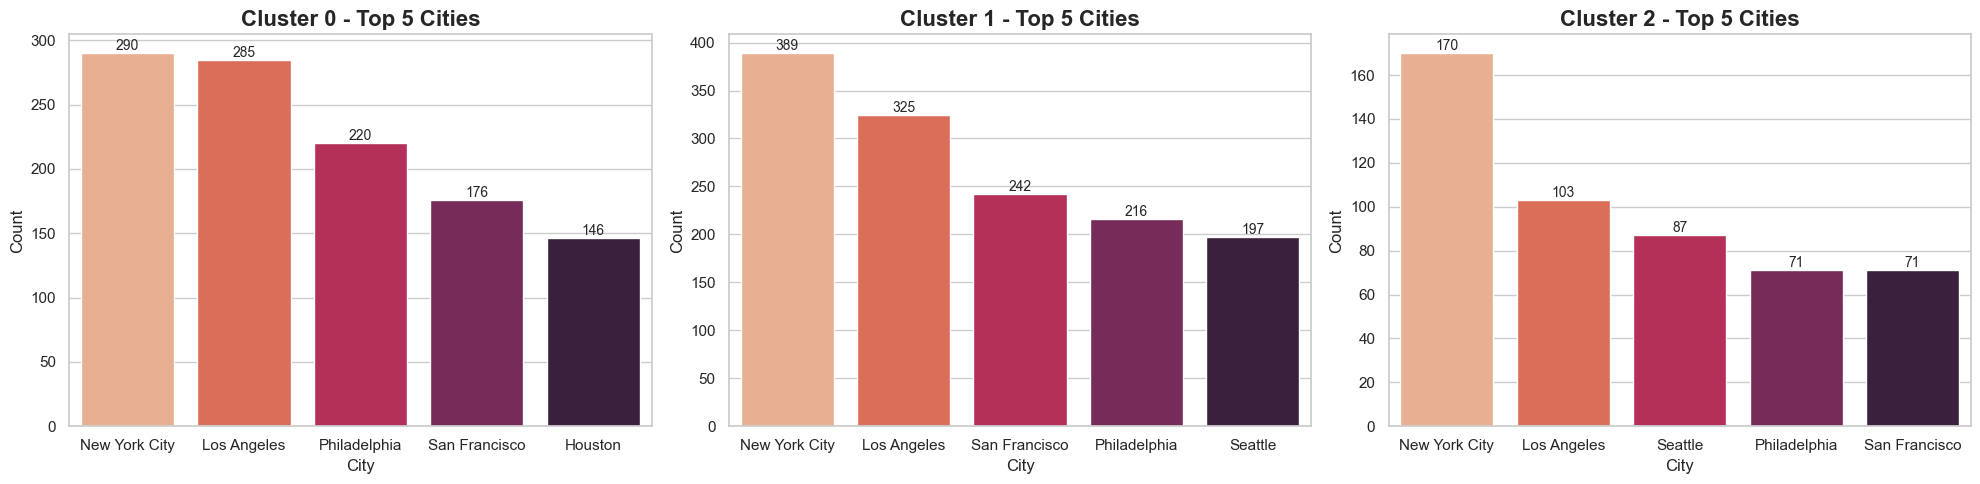

In [47]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 5))

for i in range(0, 3):
    # 獲取每個集群中前五名的城市
    city_order = df_cleaned[df_cleaned['Cluster'] == i]['City'].value_counts().head(5).index
    
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x='City', data=df_cleaned[df_cleaned['Cluster'] == i], palette='rocket_r', order=city_order)
    plt.title(f'Cluster {i} - Top 5 Cities', fontsize=16, fontweight='bold')
    plt.xlabel('City')
    plt.ylabel('Count')

    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

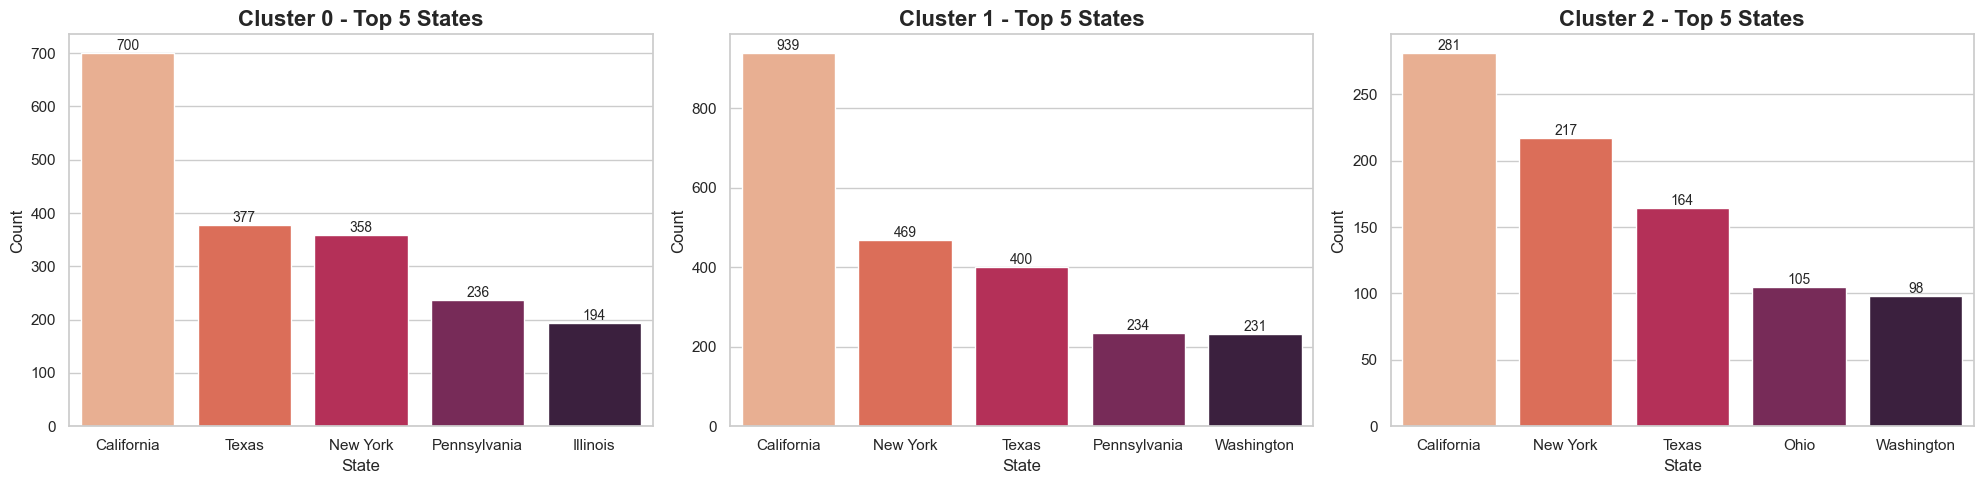

In [48]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 5))

for i in range(0, 3):
    # 獲取每個集群中前五名的州
    state_order = df_cleaned[df_cleaned['Cluster'] == i]['State'].value_counts().head(5).index
    
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x='State', data=df_cleaned[df_cleaned['Cluster'] == i], palette='rocket_r', order=state_order)
    plt.title(f'Cluster {i} - Top 5 States', fontsize=16, fontweight='bold')
    plt.xlabel('State')
    plt.ylabel('Count')

    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [49]:
df_cleaned['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

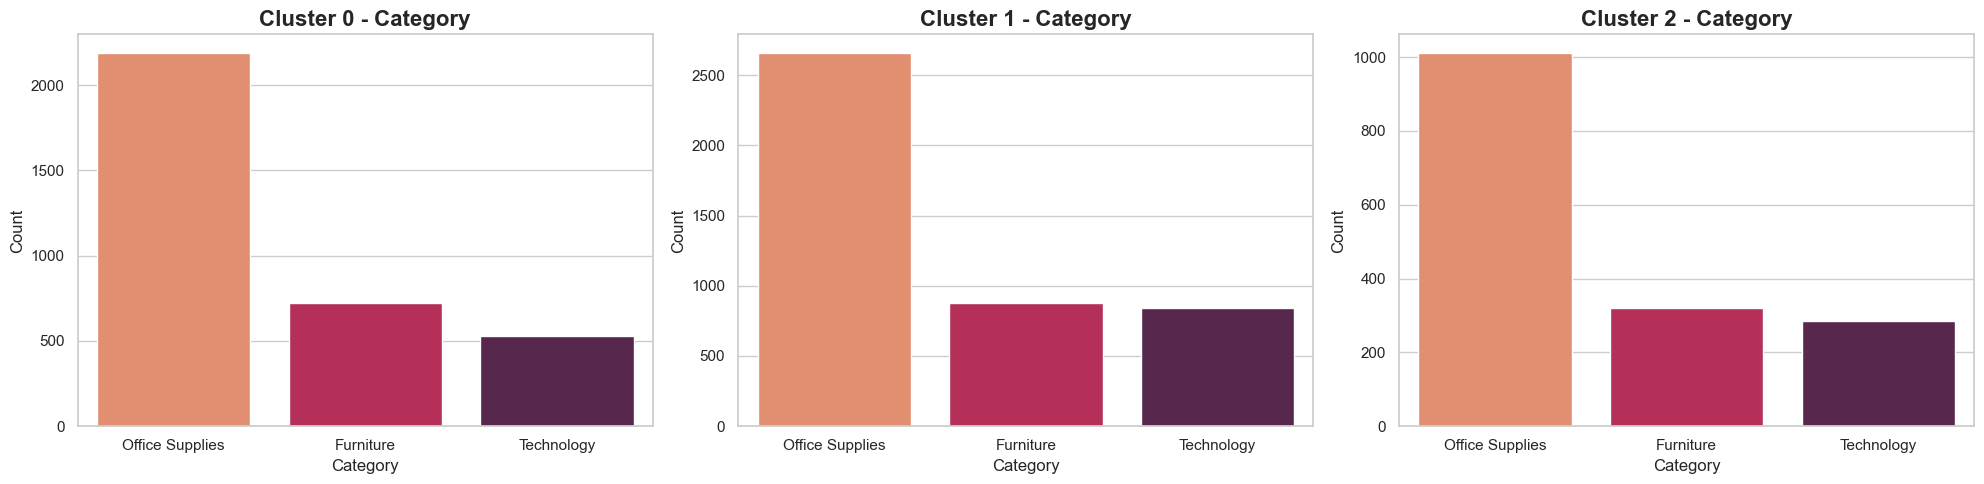

In [50]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 5))

for i in range(0, 3):

    category_order = df_cleaned[df_cleaned['Cluster'] == i]['Category'].value_counts().index
    
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x='Category', data=df_cleaned[df_cleaned['Cluster'] == i], palette='rocket_r', order = category_order)
    plt.title(f'Cluster {i} - Category', fontsize=16, fontweight='bold')
    plt.xlabel('Category')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [51]:
category_counts = df_cleaned.groupby('Cluster')['Category'].value_counts(normalize=True)
category_counts = category_counts.reset_index(name='Percentage')
category_pivot = category_counts.pivot_table(index='Cluster', columns='Category', values='Percentage', fill_value=0)

print(category_pivot.round(2))

Category  Furniture  Office Supplies  Technology
Cluster                                         
0              0.21             0.64        0.15
1              0.20             0.61        0.19
2              0.20             0.63        0.18


## 結論：
集群0 低價值集群(第二多 3439筆)
* 運輸偏好：偏好standard class的運輸
* 訂單頻率：購買數量集中在20~40之間
* 細分市場構成：以一般顧客(Consumer)為主，企業佔比也高，而家庭企業或小型企業是三個集群中最高的
* 地理分佈：各地區皆有分佈，以西部為主
* 銷售額和利潤：低銷售額及低利潤，甚至有部分消費者為負利潤，其中最低利潤在此集群
* 熱門城市：紐約市、洛杉磯、費城
* 排名最高的州：加州、德克薩斯州、紐約
* 折扣：各個折扣區段皆有此集群，注重折扣
* 產品偏好：產品價格低、數量少、喜好購買折扣多的產品

集群1 高價值集群(最多 4377筆)
* 運輸偏好：偏好standard class的運輸，但也有關注較快運輸的方式
* 訂單頻率：傾向於大量購買
* 細分市場構成：以一般顧客(Consumer)為主，但企業(Corporate)占比也高
* 地理分佈：各地區皆有分佈，以西部為主
* 銷售額和利潤：集群中最高的銷售額和利潤，為大宗買家
* 熱門城市：紐約、洛杉磯、舊金山
* 排名最高的州：加州、紐約、德克薩斯州
* 折扣：折扣偏好集中在低折扣，購買的商品價格高
* 產品偏好：喜好購買高價格產品、低折扣對於他們具吸引力、會大量購買

集群 2 潛力集群(第三多 1617筆)
* 運輸偏好：最偏好second class的運輸、皆著是first calss、standard class、same day，此集群注重運輸時間及速度
* 訂單頻率：
* 細分市場構成：以一般顧客(Consumer)為主
* 地理分佈：各低區皆有分佈，以東部及西部為主
* 銷售額和利潤：低銷售額及低利潤，有少部分負利潤，但也有利潤高於1000美元的消費者
* 熱門城市：紐約、洛杉磯、西雅圖
* 排名最高的州：加州、紐約、德克薩斯州
* 折扣：各個折扣區段皆有此集群
* 產品偏好：喜好低價格的產品、有無折扣都會購買、有買價格高的產品潛力